In [3]:
# importing libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Loading Datasets 

In [7]:
df  =pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")

In [8]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [10]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [11]:
# There are  null values in the dataset

In [12]:
df.shape

(7752, 25)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(7588, 25)

In [15]:
# After dropping the shape of DataFrame changes

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


In [17]:
df.duplicated().sum()

0

In [18]:
# There are no duplicates value in a datasets 

In [19]:
# Let's check if any Whitespaces, '', '-' are present in a datasets

In [20]:
df.isin(['','NA','-']).sum().any()

False

In [21]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [22]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [23]:
df.drop('Date',axis=1,inplace=True)

In [24]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


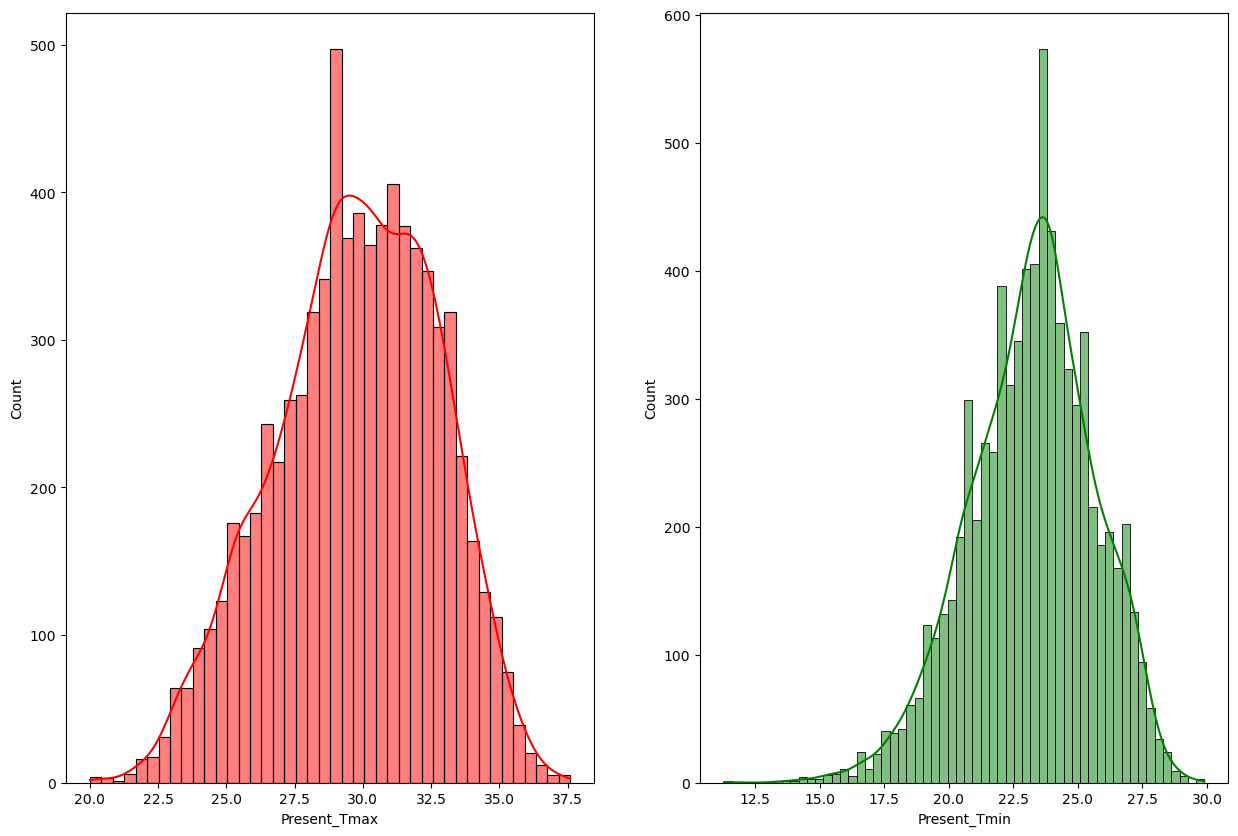

In [25]:
# plotting histogram for Present_Tmax and Present_Tmin variables
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde = True,color = 'red')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde = True,color = 'green')
plt.show()

In [26]:
# For Present Maximum Temperature varies in between 27.5 to 32.5
# For Present Minimum Temperature varies in between 22.5 to 26.0

In [27]:
df['Year'].value_counts()

Year
2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: count, dtype: int64

In [28]:
# Now we will found Maximum and minimum temperature over the period 2013-2016

In [29]:
print("Maximum Temperature",df.Present_Tmax.max())
print("Minimum Temperature",df.Present_Tmax.min())
print("Maximum Temperature",df.Present_Tmin.max())
print("Minimum Temperature",df.Present_Tmin.min())

Maximum Temperature 37.6
Minimum Temperature 20.0
Maximum Temperature 29.9
Minimum Temperature 11.3


In [30]:
# Checking Where actually this maxima and minima occurs in the dataset

In [31]:
df.loc[df.Present_Tmax == df.Present_Tmax.max()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
5717,18.0,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,0.218892,...,37.4832,127.024,56.4448,1.2313,5082.563477,37.0,27.8,2016,8,11


In [32]:
df.loc[df.Present_Tmax == df.Present_Tmax.min()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
7725,1.0,20.0,15.1,35.652172,89.97319,24.323737,16.128899,7.087329,108.981108,0.046182,...,37.6046,126.991,212.335,2.785,4614.76123,23.8,15.1,2017,8,30


In [33]:
df.loc[df.Present_Tmin == df.Present_Tmin.max()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
2397,23.0,35.3,29.9,53.946949,85.985161,30.912804,25.439537,13.011129,117.837212,0.684685,...,37.5372,126.891,15.5876,0.1554,5360.226563,31.3,24.8,2014,8,2


In [34]:
df.loc[df.Present_Tmin == df.Present_Tmin.min()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
6116,17.0,27.1,11.3,62.793823,91.726936,23.529546,17.963487,7.984566,84.48145,0.668264,...,37.6181,127.099,53.4712,0.697,4539.616699,24.6,17.1,2016,8,27


In [35]:
# Present Maximum Temperature of Present_tmax recorded at station 18 of value 37.6
# Present Minimum Temperature of Present_tmax recorded at station  1 of value 20.0 

In [36]:
# Present Maximum Temperature of Present_tmin recorded at station 23 of value 35.3
# Present Minimum Temperature of Present_tmin recorded at station  17 of value 11.3

In [37]:
# We get high value of solar radiation of high temperature and low value of solar radiation of low temperature

In [38]:
# Maximum Humidity occur when global minima occur i.e. It suggest that temperature is inversely proportional  to humidity

In [39]:
# Solar radiation have naturally going to effect on windspeed,humidity and precipitation

<Axes: xlabel='Month', ylabel='Solar radiation'>

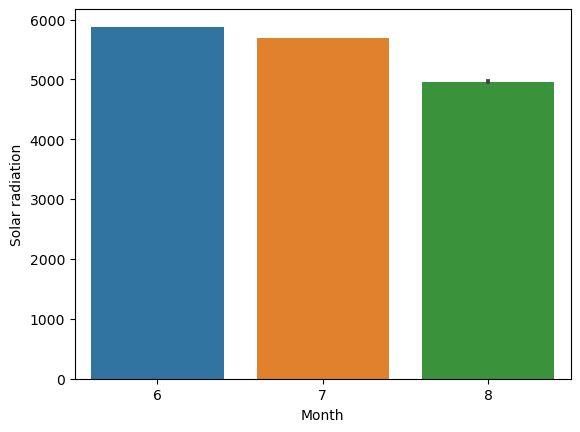

In [40]:
sns.barplot(x = df['Month'], y = df['Solar radiation'])

In [41]:
# This means that maximum solar radiation occurs in the month of 'June' and then it comes down in the month of 'July' and then 'August'

<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

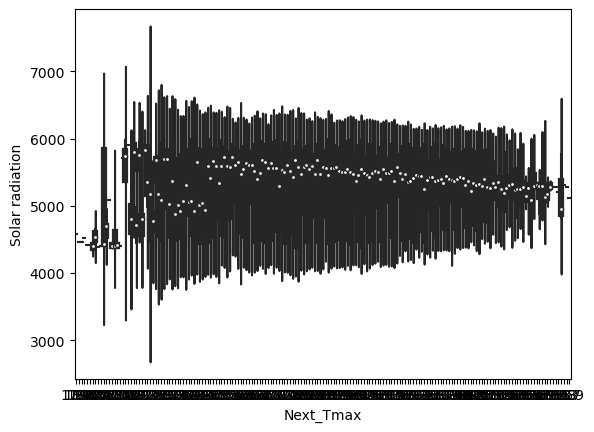

In [42]:
sns.violinplot(x = df['Next_Tmax'], y = df['Solar radiation'], color = 'green')

In [43]:
 # As it is seen with increase in solar radiation quite decreases in next maximum temperature

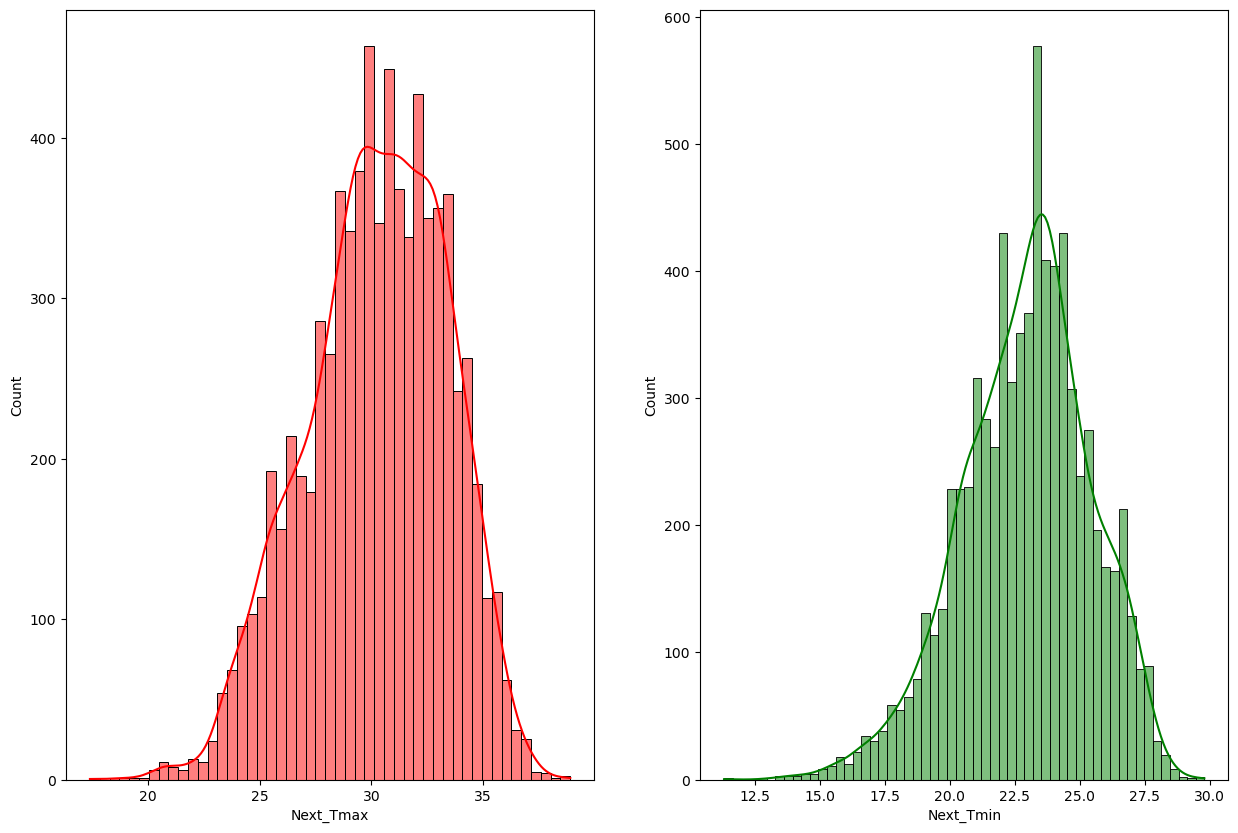

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde = True,color = 'red')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde = True,color = 'green')
plt.show()

In [45]:
# Next Maximum Temperature VS Cloud Cover

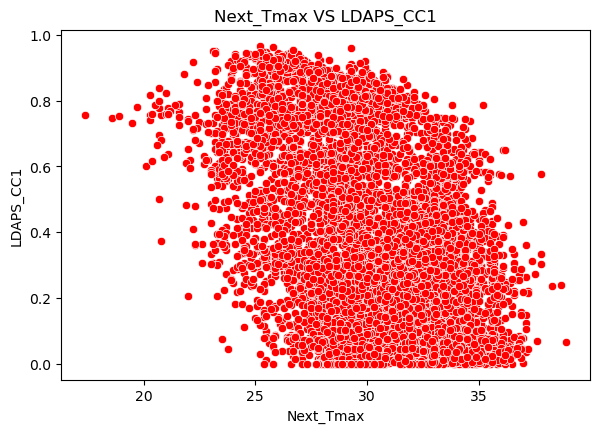

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = df['Next_Tmax'],y = df['LDAPS_CC1'],color = 'red')
plt.title('Next_Tmax VS LDAPS_CC1')
plt.show()

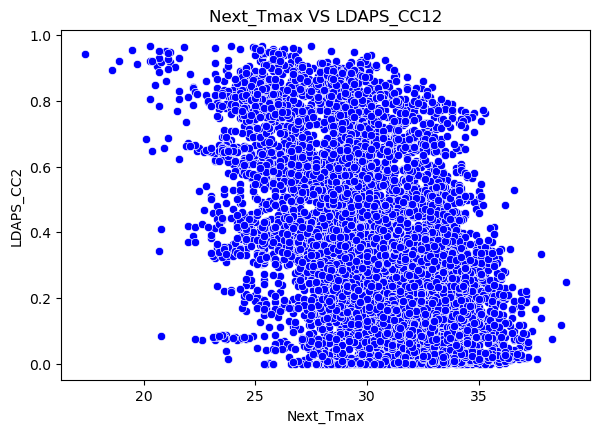

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.scatterplot(x = df['Next_Tmax'],y = df['LDAPS_CC2'],color = 'blue')
plt.title('Next_Tmax VS LDAPS_CC12')
plt.show()

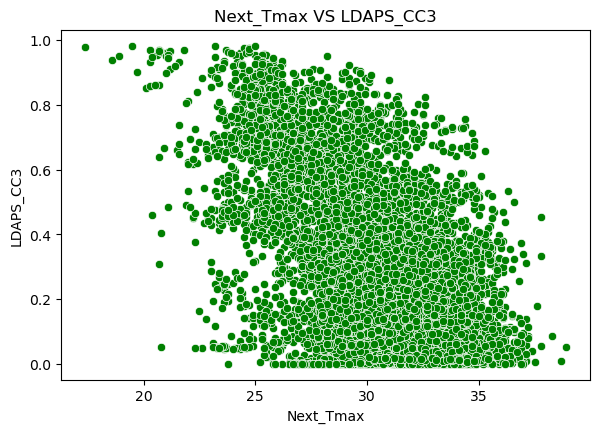

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
sns.scatterplot(x = df['Next_Tmax'],y = df['LDAPS_CC3'],color = 'green')
plt.title('Next_Tmax VS LDAPS_CC3')
plt.show()

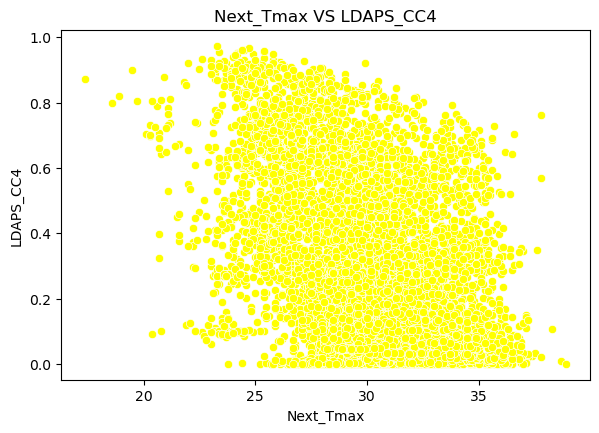

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
sns.scatterplot(x = df['Next_Tmax'],y = df['LDAPS_CC4'],color = 'yellow')
plt.title('Next_Tmax VS LDAPS_CC4')
plt.show()

In [50]:
# Observation --> Irrespective of 6 hr quarter in 24 hr day time ,Next-Day Temperature decreases as cloud cover increases beyond 0.6

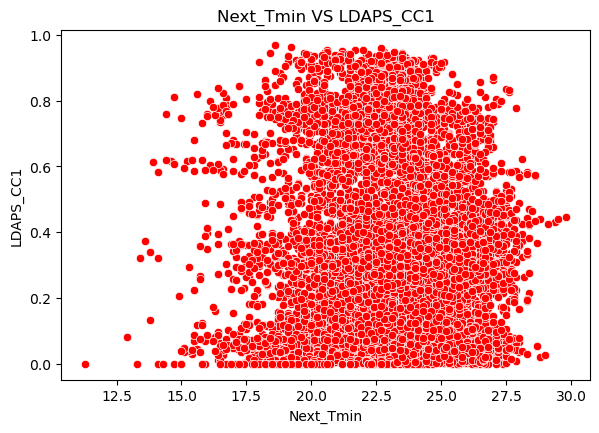

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = df['Next_Tmin'],y = df['LDAPS_CC1'],color = 'red')
plt.title('Next_Tmin VS LDAPS_CC1')
plt.show()

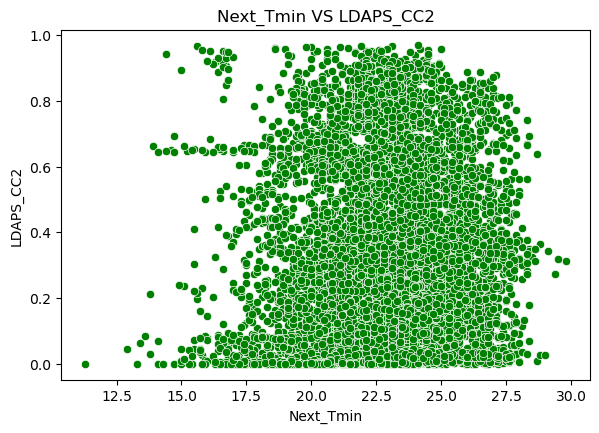

In [52]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.scatterplot(x = df['Next_Tmin'],y = df['LDAPS_CC2'],color = 'green')
plt.title('Next_Tmin VS LDAPS_CC2')
plt.show()

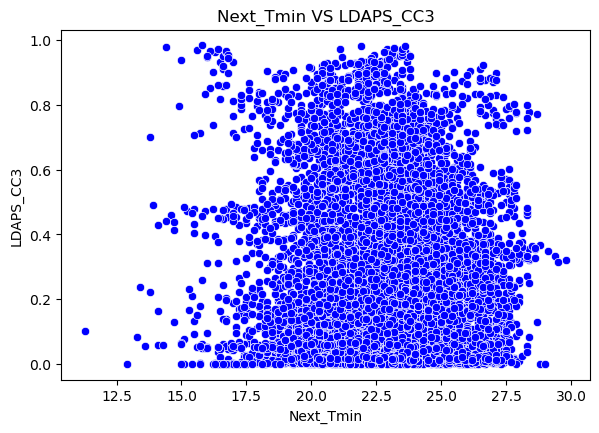

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
sns.scatterplot(x = df['Next_Tmin'],y = df['LDAPS_CC3'],color = 'blue')
plt.title('Next_Tmin VS LDAPS_CC3')
plt.show()

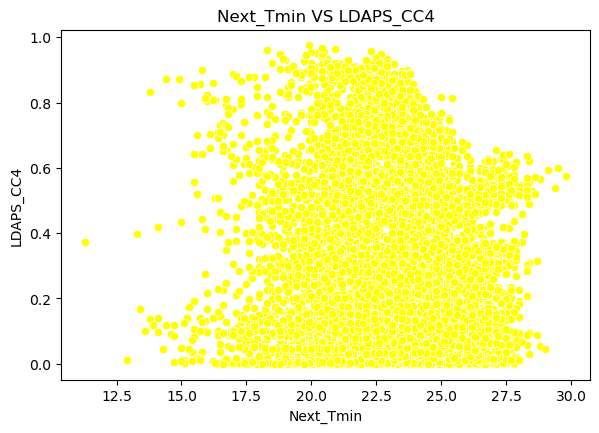

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
sns.scatterplot(x = df['Next_Tmin'],y = df['LDAPS_CC4'],color = 'yellow')
plt.title('Next_Tmin VS LDAPS_CC4')
plt.show()

In [55]:
# No significant relation between Next_Tmin and CloudCover in scatterplot 

In [56]:
# Next day Temperature VS Month

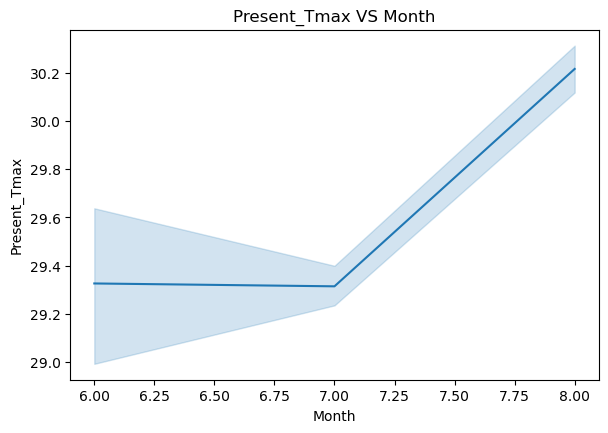

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x = df['Month'],y = df['Present_Tmax'],data = df)
plt.title('Present_Tmax VS Month')
plt.show()

In [58]:
# Present_Tmax is stable till 'June' month then it spikes up till 'August' month

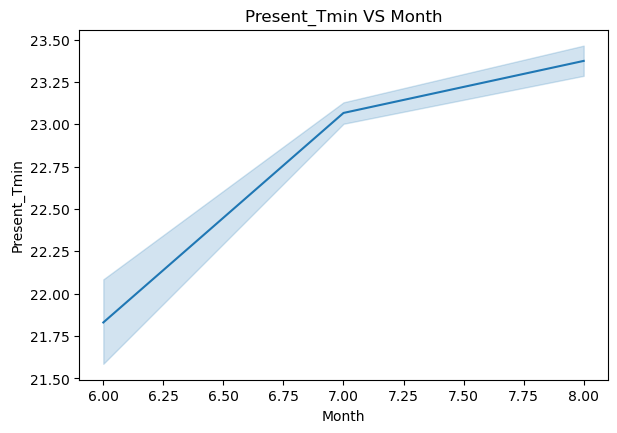

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(x = df['Month'],y = df['Present_Tmin'],data = df)
plt.title('Present_Tmin VS Month')
plt.show()

In [60]:
#Same goes for the Present_Tmin Temperature over the month

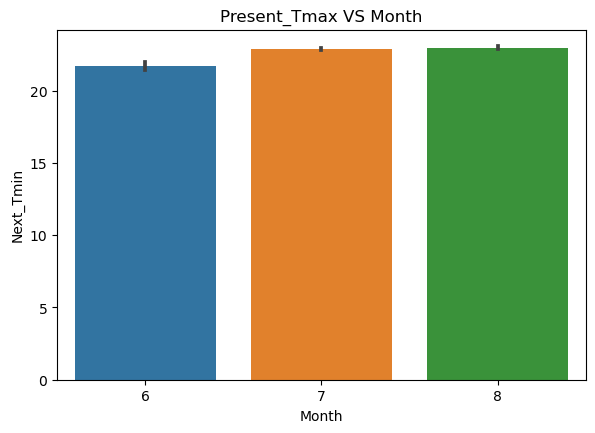

In [61]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['Month'],y = df['Next_Tmin'],data = df)
plt.title('Present_Tmax VS Month')
plt.show()

In [62]:
# Next_Tmin is Approximately same in 'July' and 'August' month

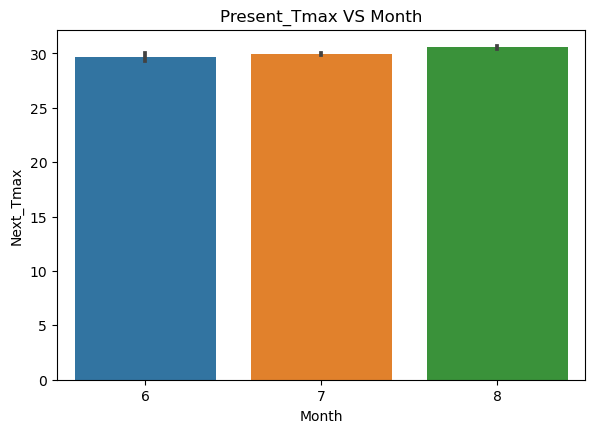

In [63]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['Month'],y = df['Next_Tmax'],data = df)
plt.title('Present_Tmax VS Month')
plt.show()

In [64]:
# Same goes for the Next_Tmin Temperature over the month

In [65]:
# Next Day precipitation vs month

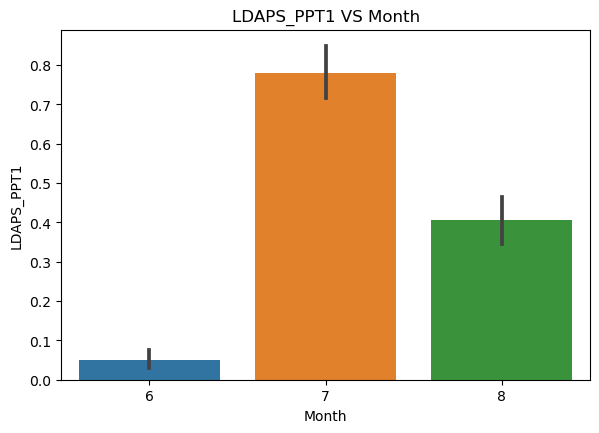

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['Month'],y = df['LDAPS_PPT1'],data = df)
plt.title('LDAPS_PPT1 VS Month')
plt.show()

In [67]:
# Next Day precipitation is higher in 'July' month

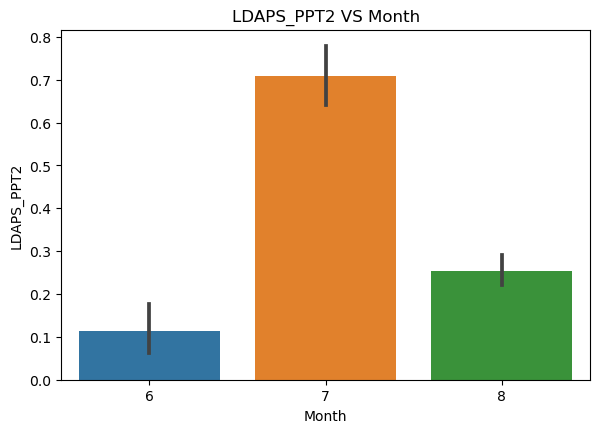

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['Month'],y = df['LDAPS_PPT2'],data = df)
plt.title('LDAPS_PPT2 VS Month')
plt.show()

In [69]:
# Same goes for second half

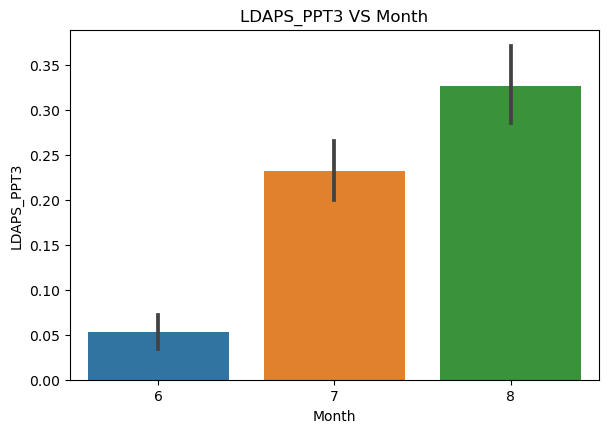

In [70]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['Month'],y = df['LDAPS_PPT3'],data = df)
plt.title('LDAPS_PPT3 VS Month')
plt.show()

In [71]:
# In Third quarter Next- Day Precipitation is high in 'August' month

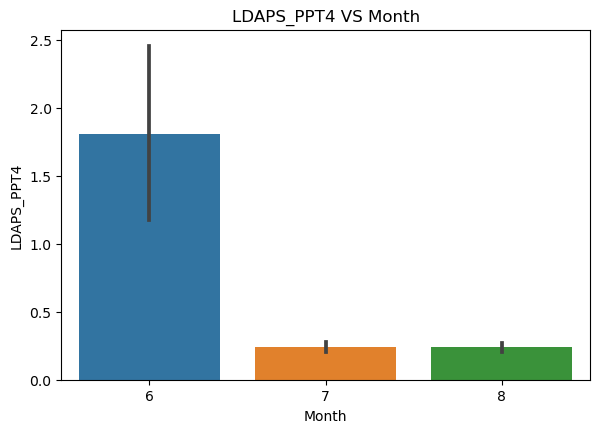

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['Month'],y = df['LDAPS_PPT4'],data = df)
plt.title('LDAPS_PPT4 VS Month')
plt.show()

In [73]:
# In Fourth quarter Next- Day Precipitation is high in 'June' month

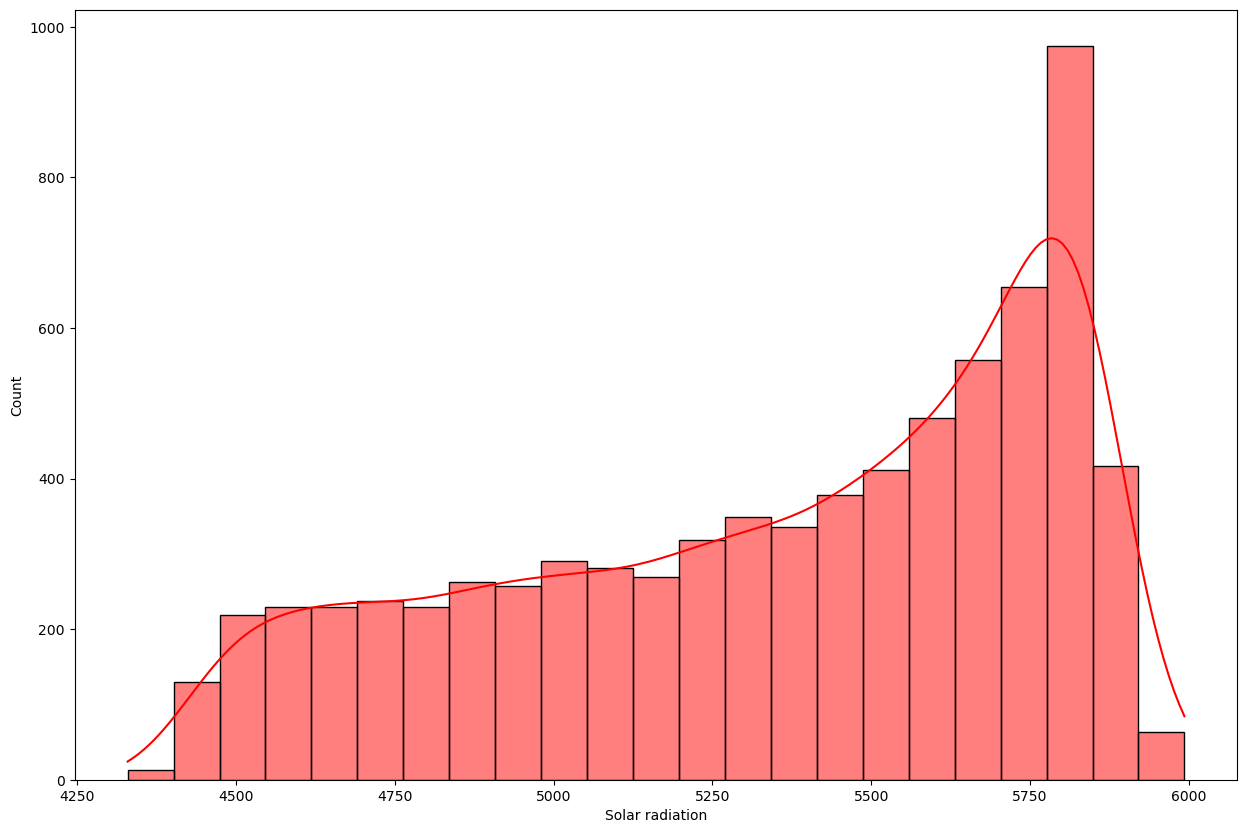

In [74]:
plt.figure(figsize=(15,10))
sns.histplot(df['Solar radiation'], kde = True,color = 'red')
plt.show()

In [75]:
# The graph is left skewed for Solar Radiation

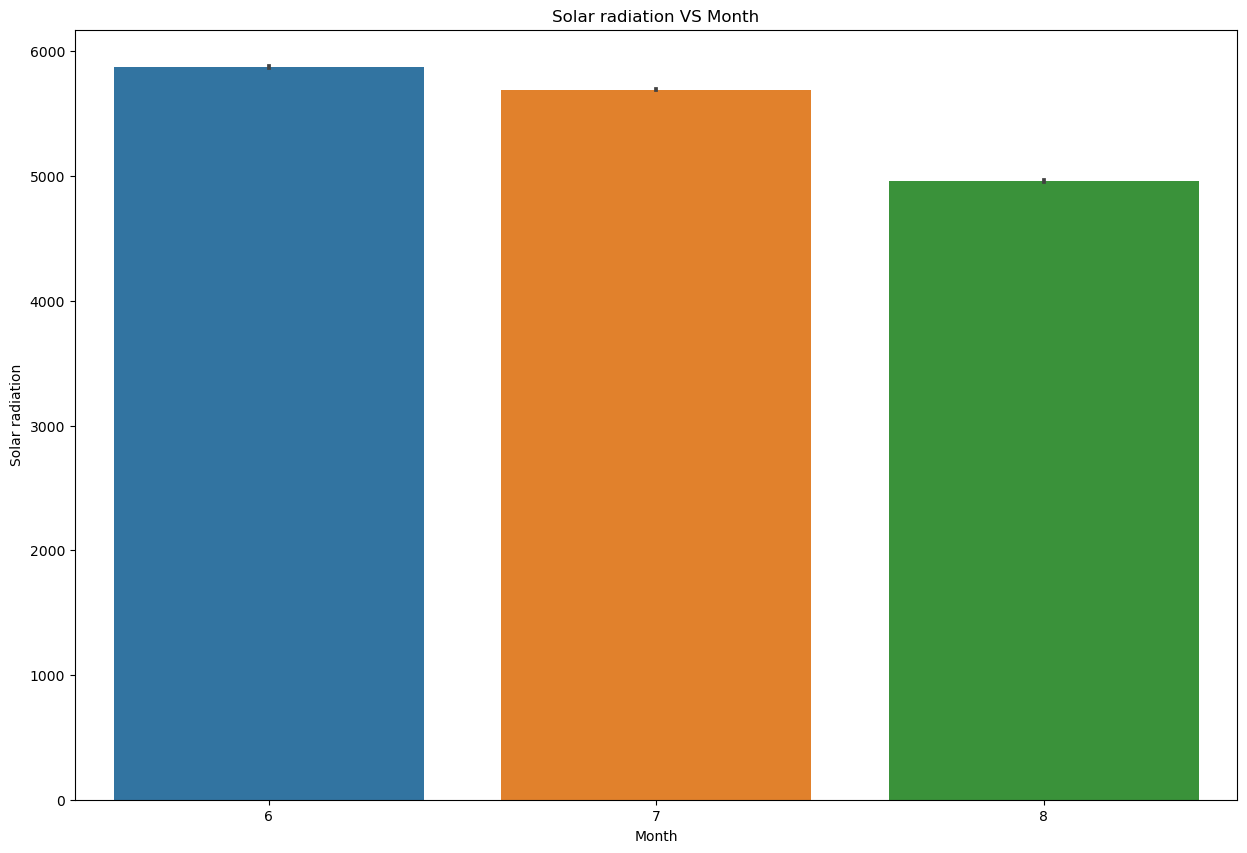

In [76]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['Month'],y = df['Solar radiation'],data = df)
plt.title('Solar radiation VS Month')
plt.show()

In [77]:
# Over the month Solar radiation decreases

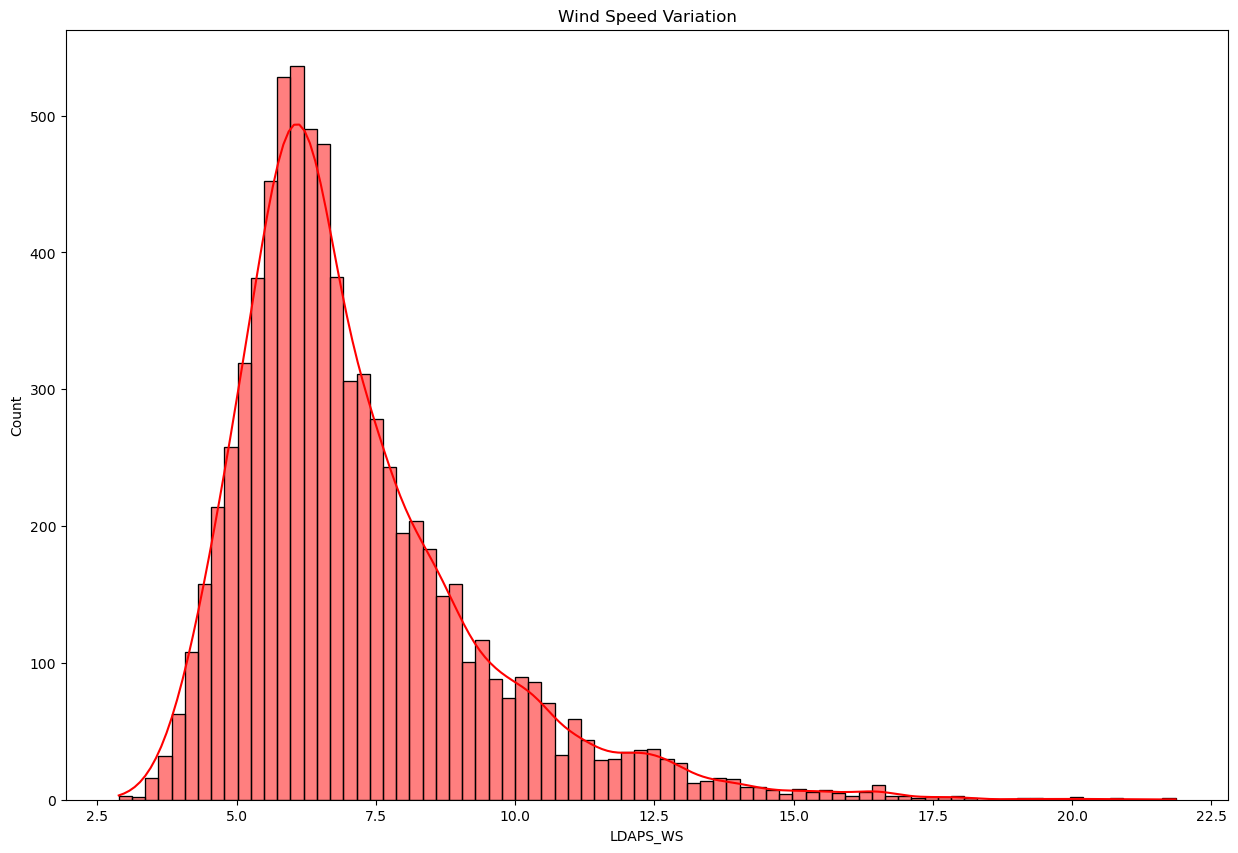

In [78]:
plt.figure(figsize=(15,10))
sns.histplot(df['LDAPS_WS'], kde = True,color = 'red')
plt.title('Wind Speed Variation')
plt.show()

In [79]:
# The graph is right skewed for Wind Speed
# Most of our reading lies in the range of 5-8

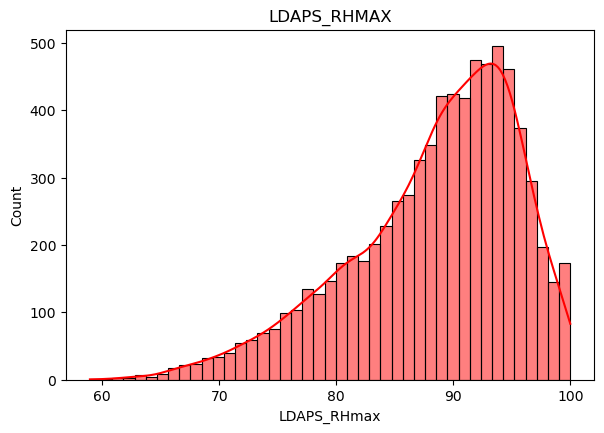

In [80]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x = df['LDAPS_RHmax'],kde = True, color = 'red')
plt.title('LDAPS_RHMAX')
plt.show()

In [81]:
# The graph is left skewed for RHmax
# Most of our reading lies in the range of 90-95

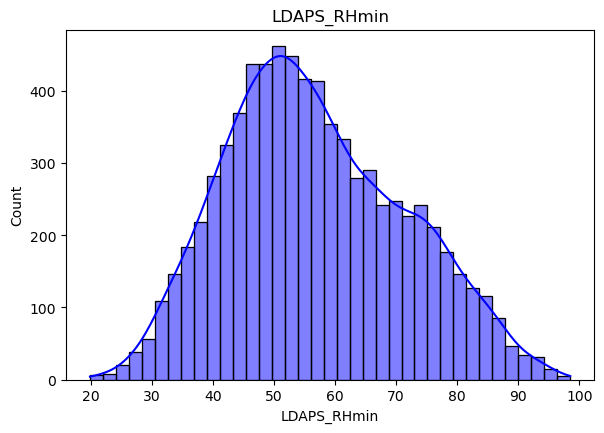

In [82]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x = df['LDAPS_RHmin'],kde = True, color = 'blue')
plt.title('LDAPS_RHmin')
plt.show()

In [83]:
# The Graph is slightly right skewed for RHmin
# Most of our reading lies in the range of 45-60 

<function matplotlib.pyplot.show(close=None, block=None)>

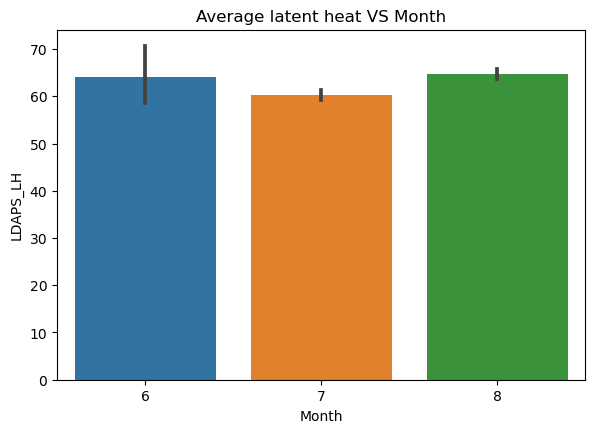

In [84]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['Month'],y = df['LDAPS_LH'],data = df)
plt.title('Average latent heat VS Month')
plt.show

In [85]:
# Minimum latent heat is observed in 'July' month

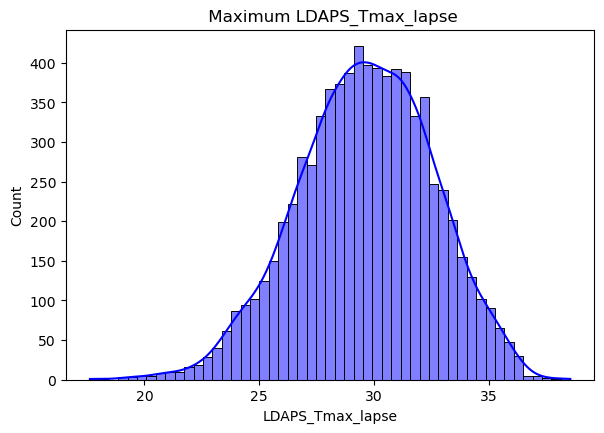

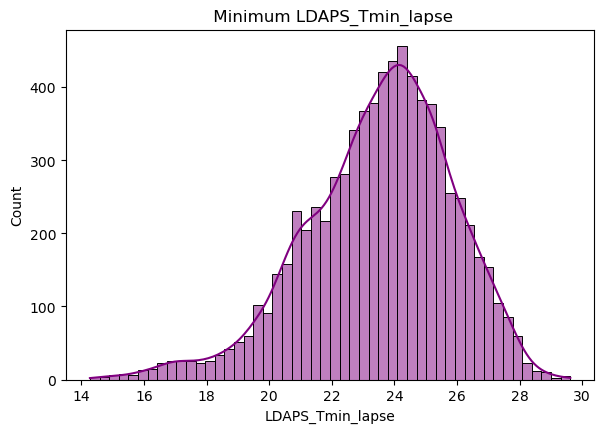

In [86]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'], kde = True,color = 'blue')
plt.title(' Maximum LDAPS_Tmax_lapse')

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'], kde = True,color = 'purple')
plt.title(' Minimum LDAPS_Tmin_lapse')
   
plt.show()

In [87]:
# Both are almost normally distributed

In [88]:
# Outlier Detection

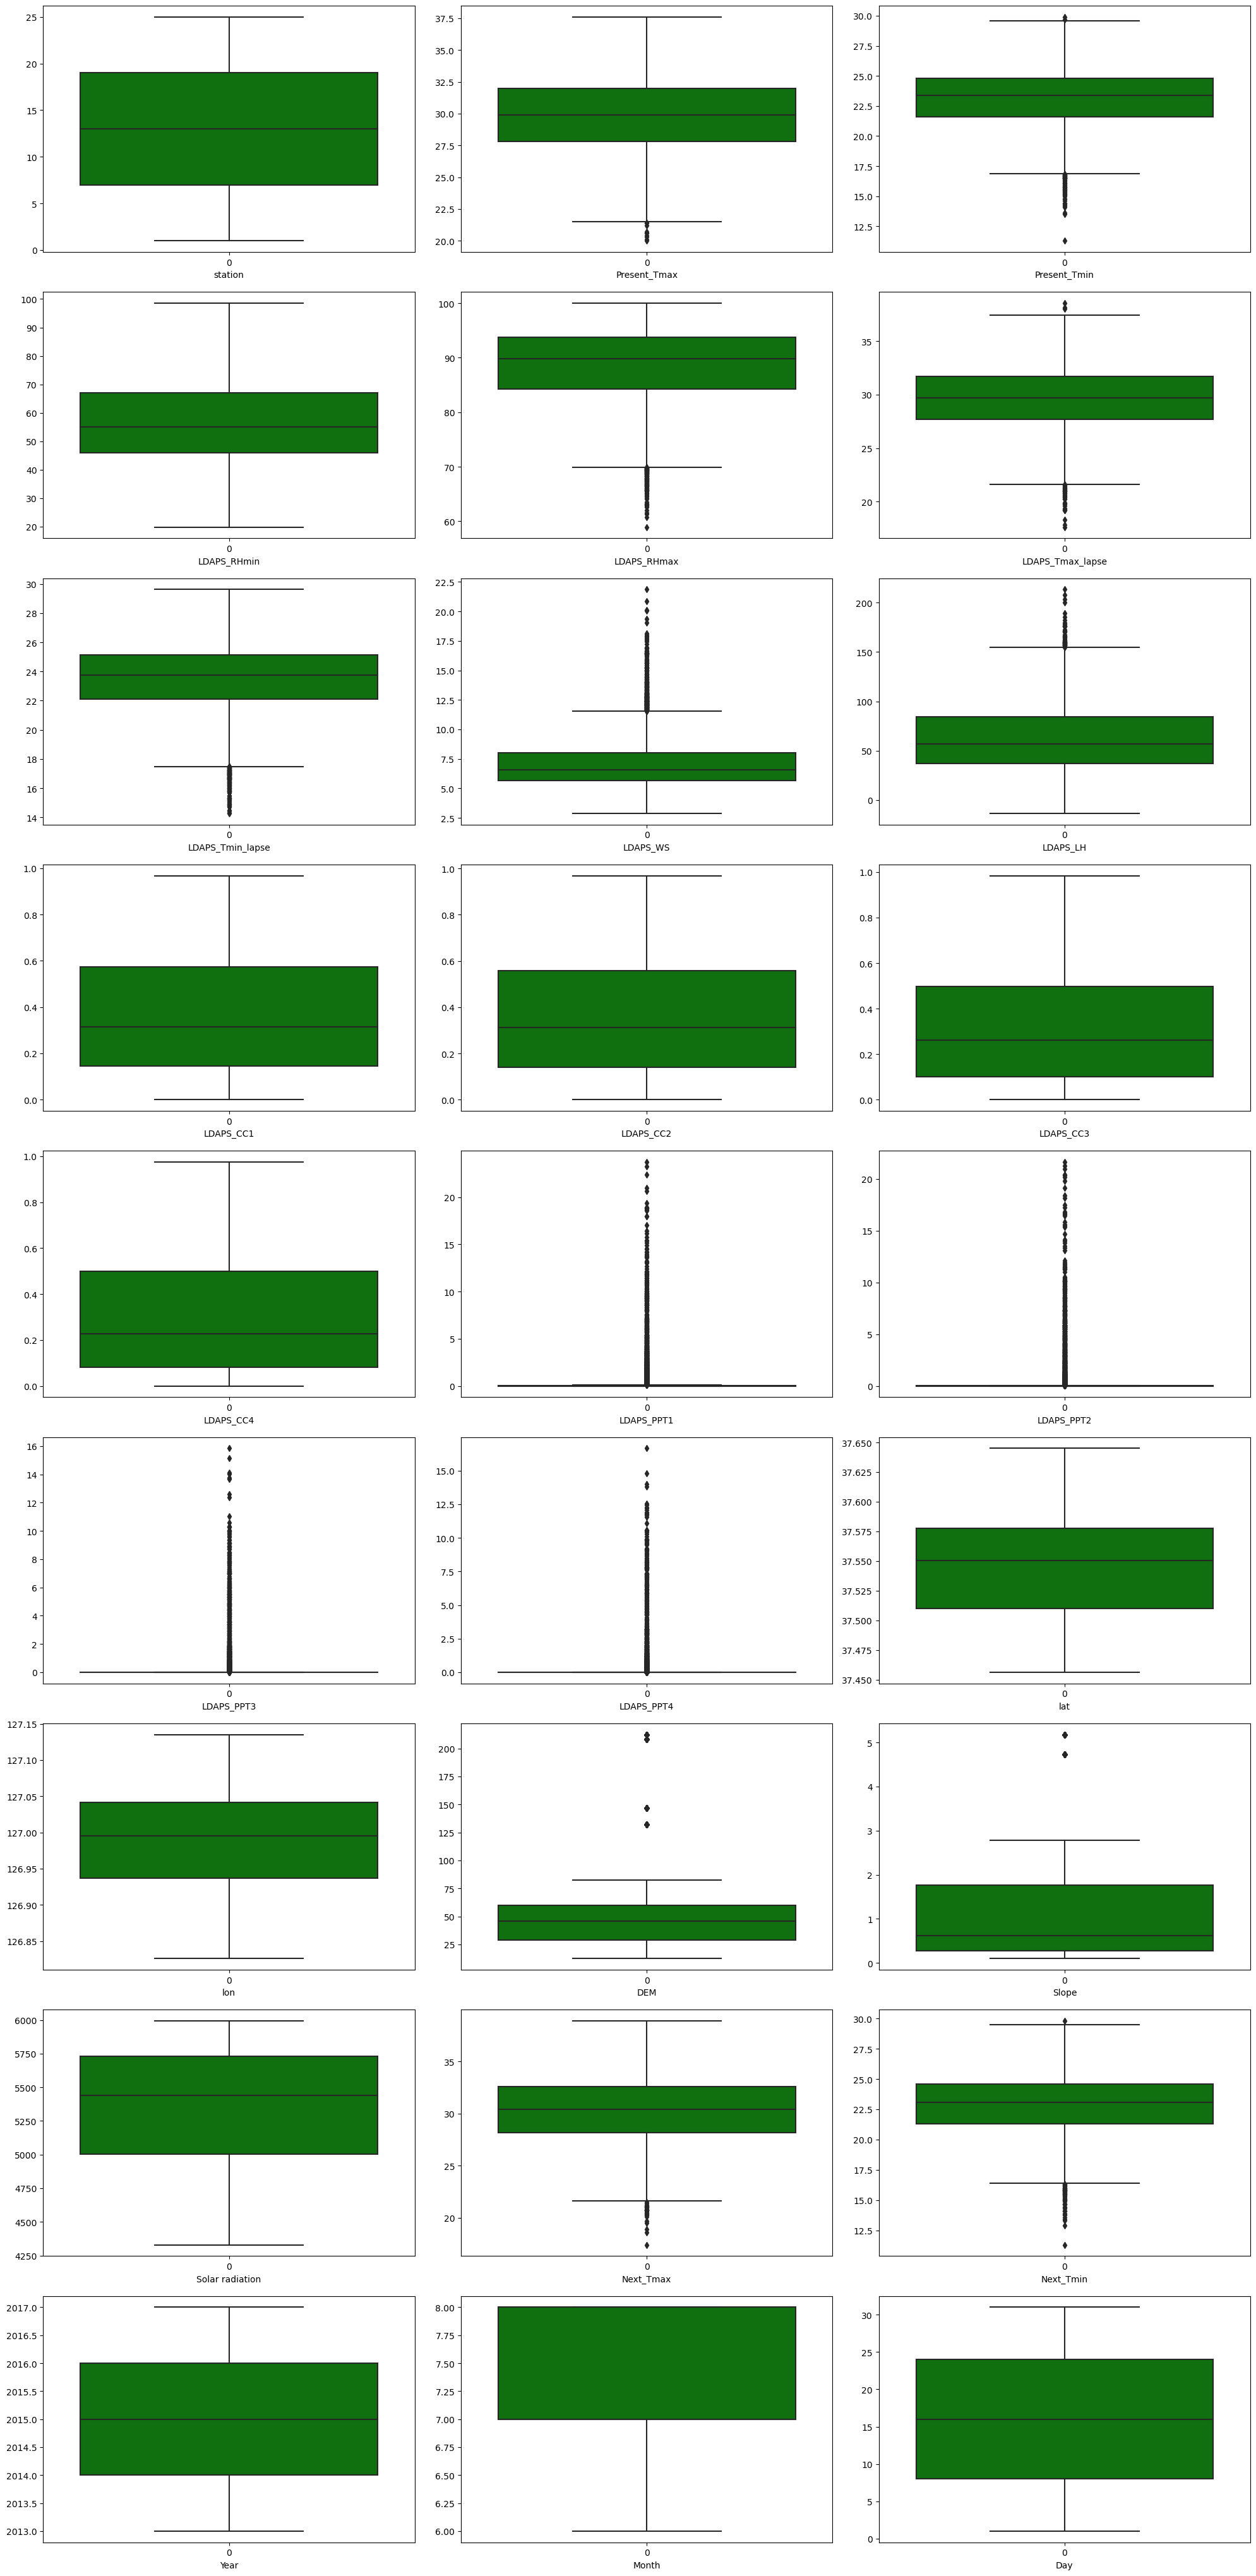

In [89]:
plt.figure(figsize=(20,45))
plot_number = 1

for column in df:
    if plot_number <= 29:
        ax = plt.subplot(10, 3, plot_number)
        sns.boxplot(df[column], color = 'green')
        plt.xlabel(column, fontsize = 10)
    plot_number = plot_number + 1
plt.tight_layout()
plt.show()

In [90]:
# From the boxplot we can see that there are outliers in our dataset

In [91]:
# Outliers removal using Zscore method

In [92]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df_1 = df[(z<3).all(axis = 1)]

In [93]:
df.shape

(7588, 27)

In [94]:
df_1.shape

(6739, 27)

In [95]:
df = df_1.copy()

In [96]:
# We can see that our dataset is now free of outliers

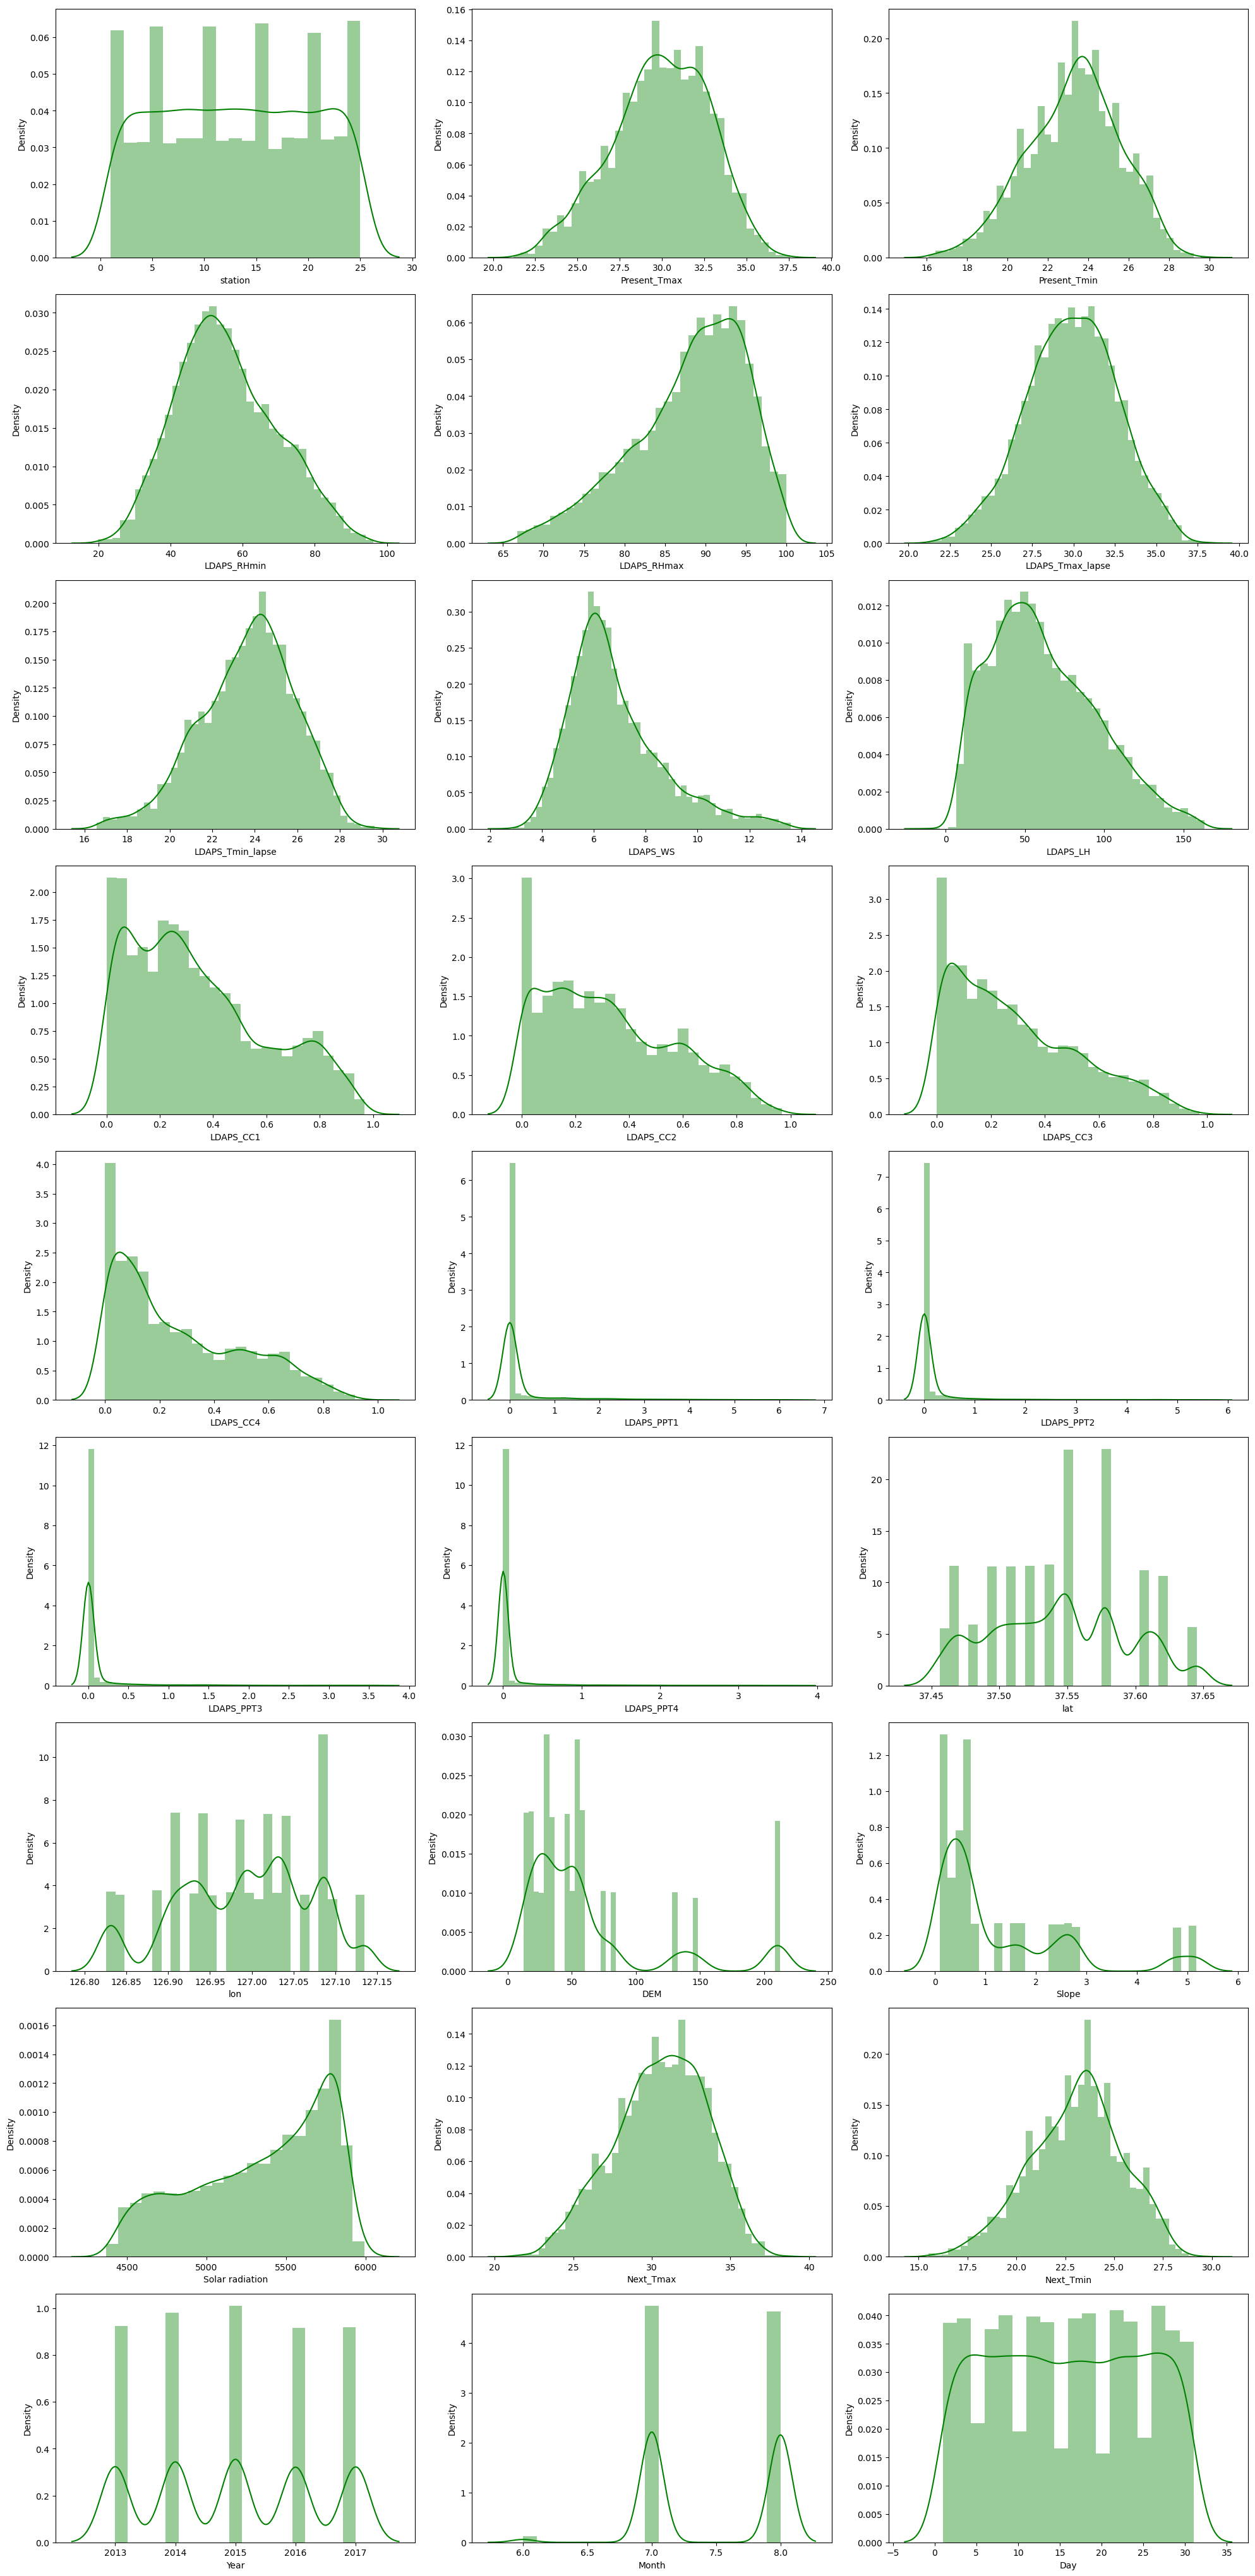

In [97]:
plt.figure(figsize=(20,45))
plot_number = 1

for column in df:
    if plot_number <= 29:
        ax = plt.subplot(10, 3, plot_number)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column, fontsize = 10)
    plot_number = plot_number + 1
plt.tight_layout()
plt.show()

In [98]:
# There is no relevance for skewness in discrete numerical or categorical features and we also ignore the skewness in our target variable

In [99]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64

In [100]:
# Some are positively skewed and others are negatively skewed

In [101]:
skewness = df.skew()
threshold = 0.5
high_skewness = skewness[skewness>threshold].index

def log_transform(x):
    return np.log(x+1)
df_transformed = df.copy()

for col in high_skewness:
    df_transformed[col] = log_transform(df[col])

In [102]:
df_final = pd.concat([df_transformed,df[high_skewness.difference(df.columns)]],axis = 1)

In [103]:
df_final.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.473278
LDAPS_LH           -0.616039
LDAPS_CC1           0.329077
LDAPS_CC2           0.246509
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64

In [104]:
# Skewness has not been removed but reduced for columns with high skewness like LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 

In [105]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
station,1.000000,0.110291,0.133638,-0.069582,-0.176388,0.066863,0.104401,0.023075,-0.135023,0.008671,...,-0.241811,-0.122829,-0.257894,-0.096863,-0.032810,0.106378,0.129110,0.006658,0.011380,0.005032
Present_Tmax,0.110291,1.000000,0.610428,-0.154266,-0.297804,0.540680,0.616886,-0.105162,0.130771,-0.290078,...,-0.052041,0.011132,-0.168792,-0.091336,-0.059891,0.586943,0.615950,0.099185,0.169326,-0.130708
Present_Tmin,0.133638,0.610428,1.000000,0.151385,-0.039688,0.441577,0.764258,0.018711,-0.004055,0.090828,...,-0.072707,-0.043201,-0.241396,-0.138107,0.020030,0.438813,0.785946,0.099222,0.106547,-0.082712
LDAPS_RHmin,-0.069582,-0.154266,0.151385,1.000000,0.552581,-0.555583,0.129481,0.236324,-0.035217,0.574389,...,0.090054,-0.093969,0.094391,0.119216,0.251733,-0.433872,0.134518,0.001709,-0.179437,-0.073118
LDAPS_RHmax,-0.176388,-0.297804,-0.039688,0.552581,1.000000,-0.385695,-0.142575,0.094523,0.274590,0.409436,...,0.200216,0.018945,0.172348,0.218465,0.153673,-0.301797,-0.097490,-0.140290,-0.118457,-0.015800
LDAPS_Tmax_lapse,0.066863,0.540680,0.441577,-0.555583,-0.385695,1.000000,0.621299,-0.229614,0.036340,-0.416255,...,-0.038285,0.106354,-0.162061,-0.148246,0.012974,0.816861,0.553227,0.066794,0.116760,-0.139339
LDAPS_Tmin_lapse,0.104401,0.616886,0.764258,0.129481,-0.142575,0.621299,1.000000,-0.052648,-0.135842,0.037375,...,-0.090587,-0.024177,-0.177845,-0.172382,0.106033,0.546479,0.875382,0.050935,0.062899,-0.141725
LDAPS_WS,0.023075,-0.105162,0.018711,0.236324,0.094523,-0.229614,-0.052648,1.000000,-0.045067,0.257654,...,-0.014440,-0.077116,0.150448,0.118546,0.136180,-0.277823,-0.013668,-0.135636,-0.110022,-0.068704
LDAPS_LH,-0.135023,0.130771,-0.004055,-0.035217,0.274590,0.036340,-0.135842,-0.045067,1.000000,-0.144578,...,0.124764,0.021578,0.068085,0.100776,-0.031060,0.176077,-0.046540,0.069044,0.049639,-0.026795
LDAPS_CC1,0.008671,-0.290078,0.090828,0.574389,0.409436,-0.416255,0.037375,0.257654,-0.144578,1.000000,...,-0.006352,-0.013794,-0.030685,-0.036418,0.244497,-0.453763,0.008400,-0.069276,-0.222037,-0.046380


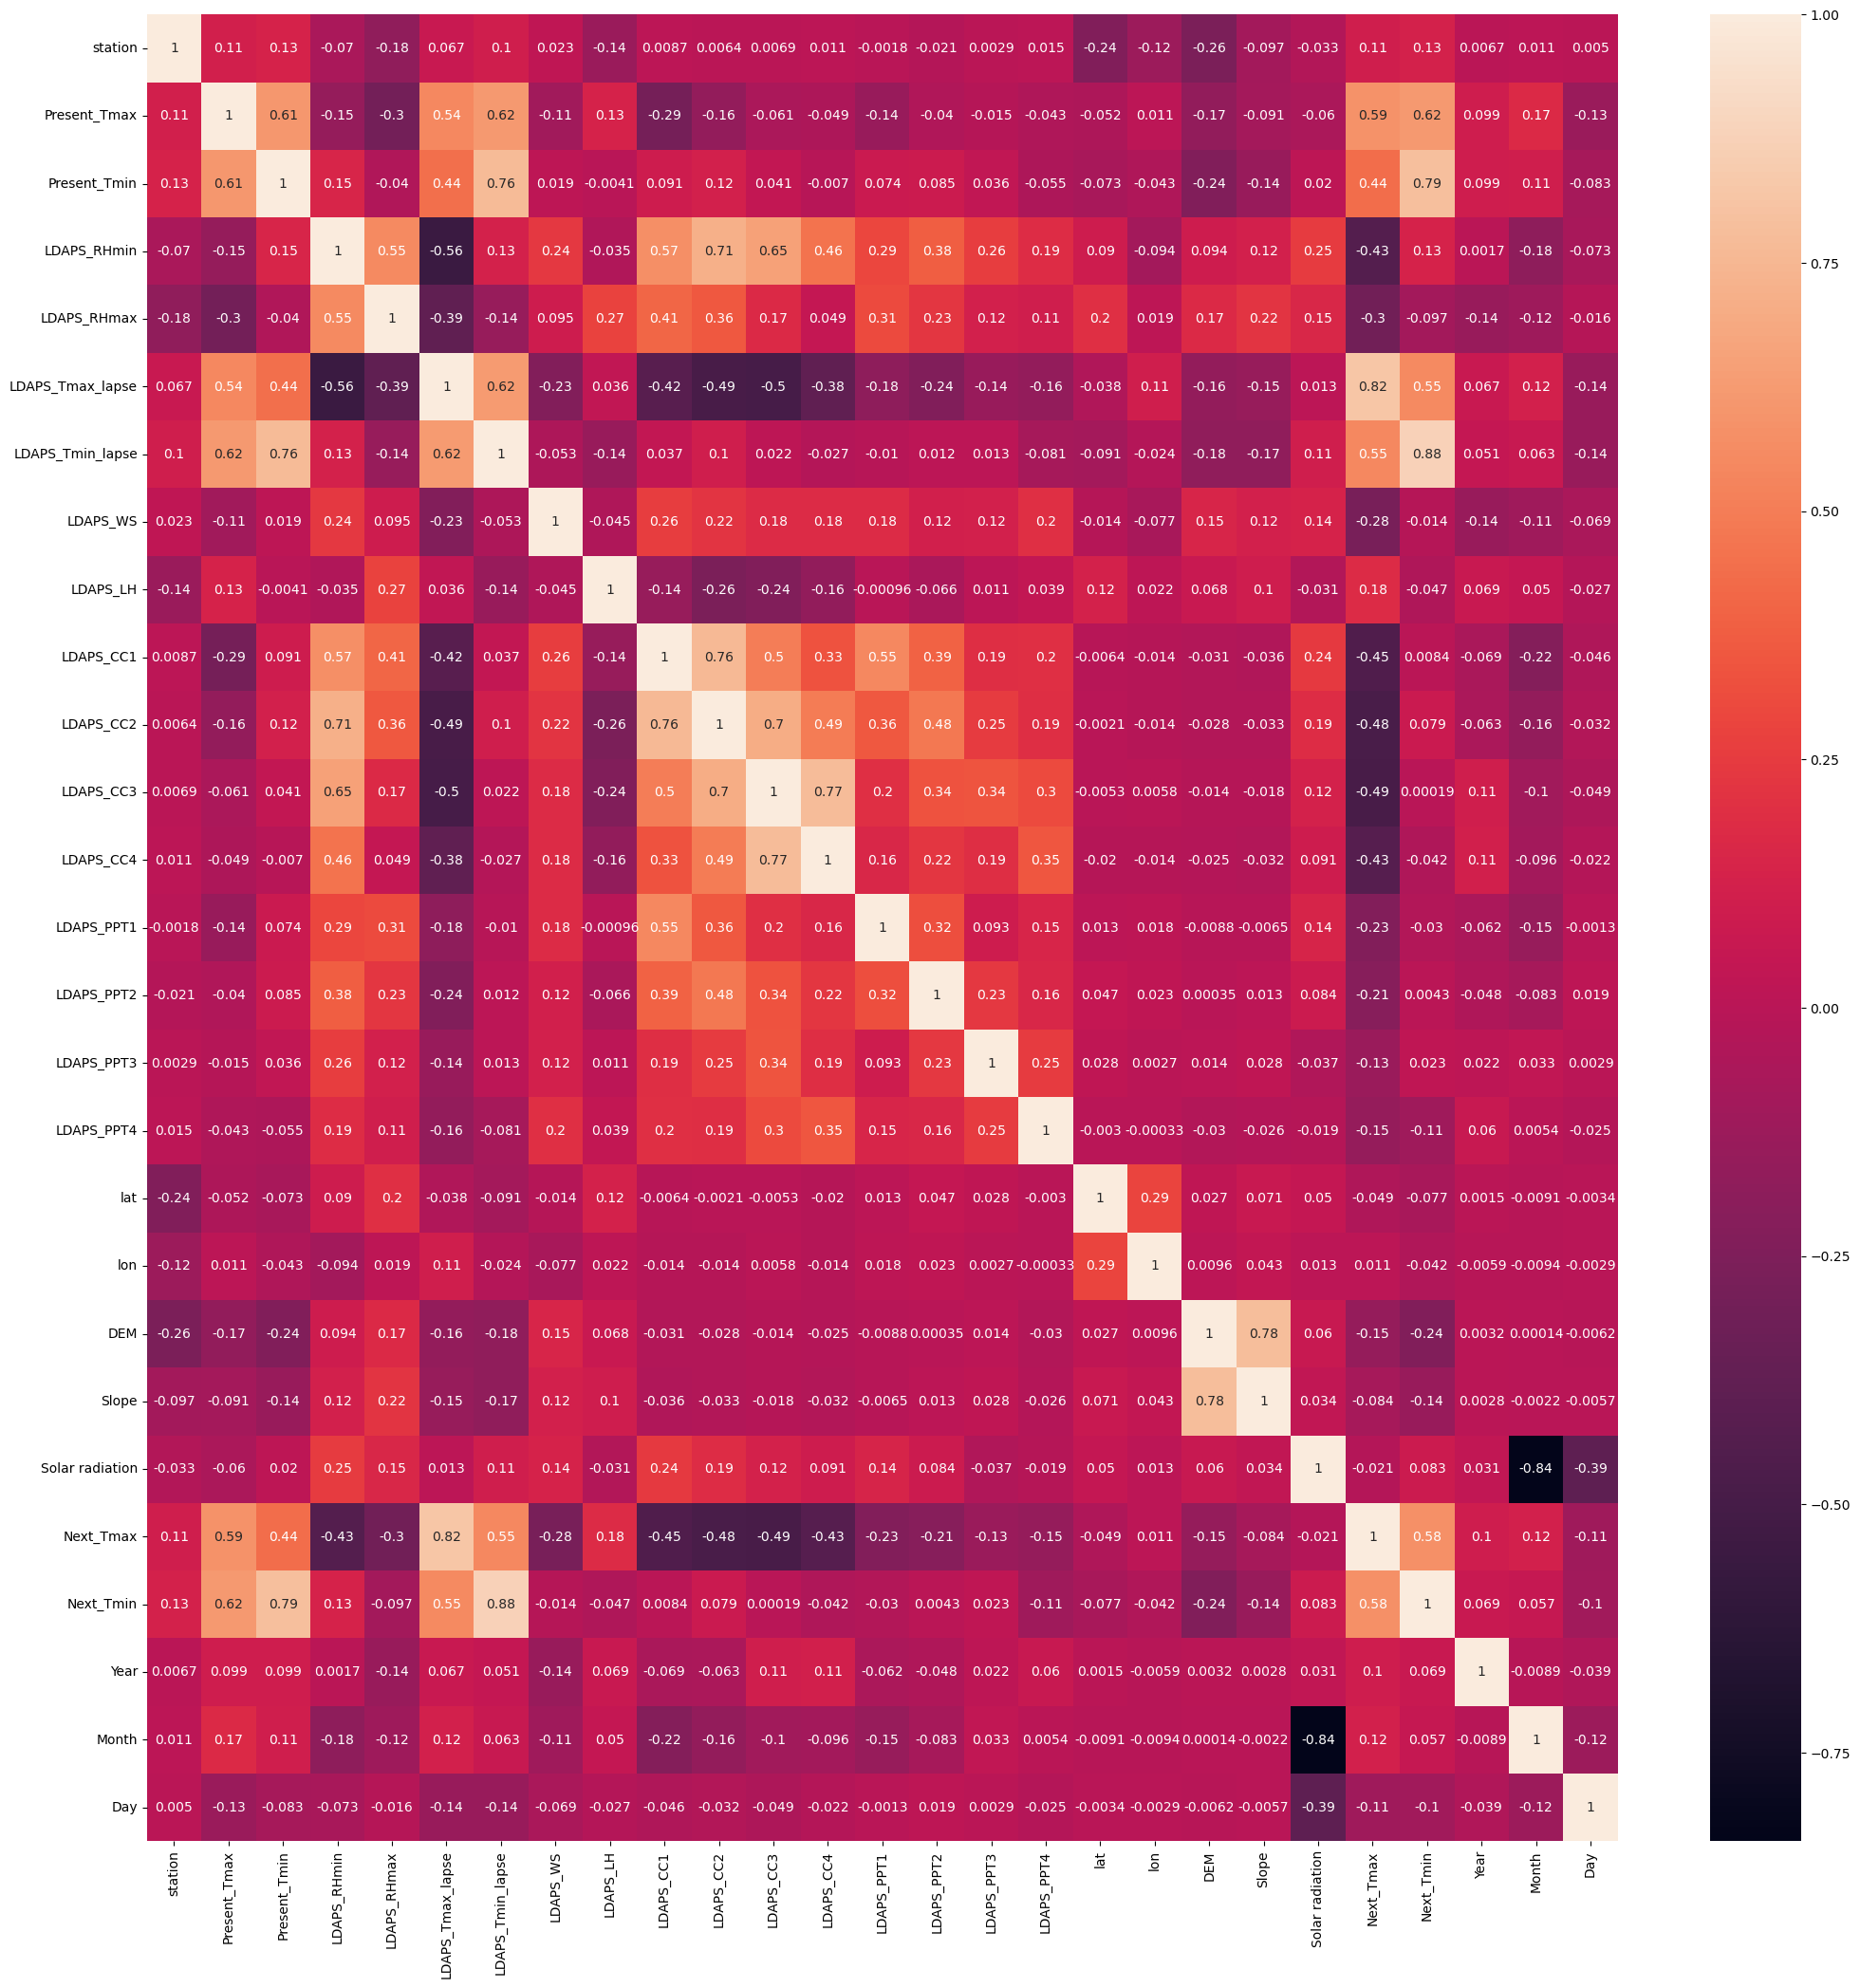

In [106]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

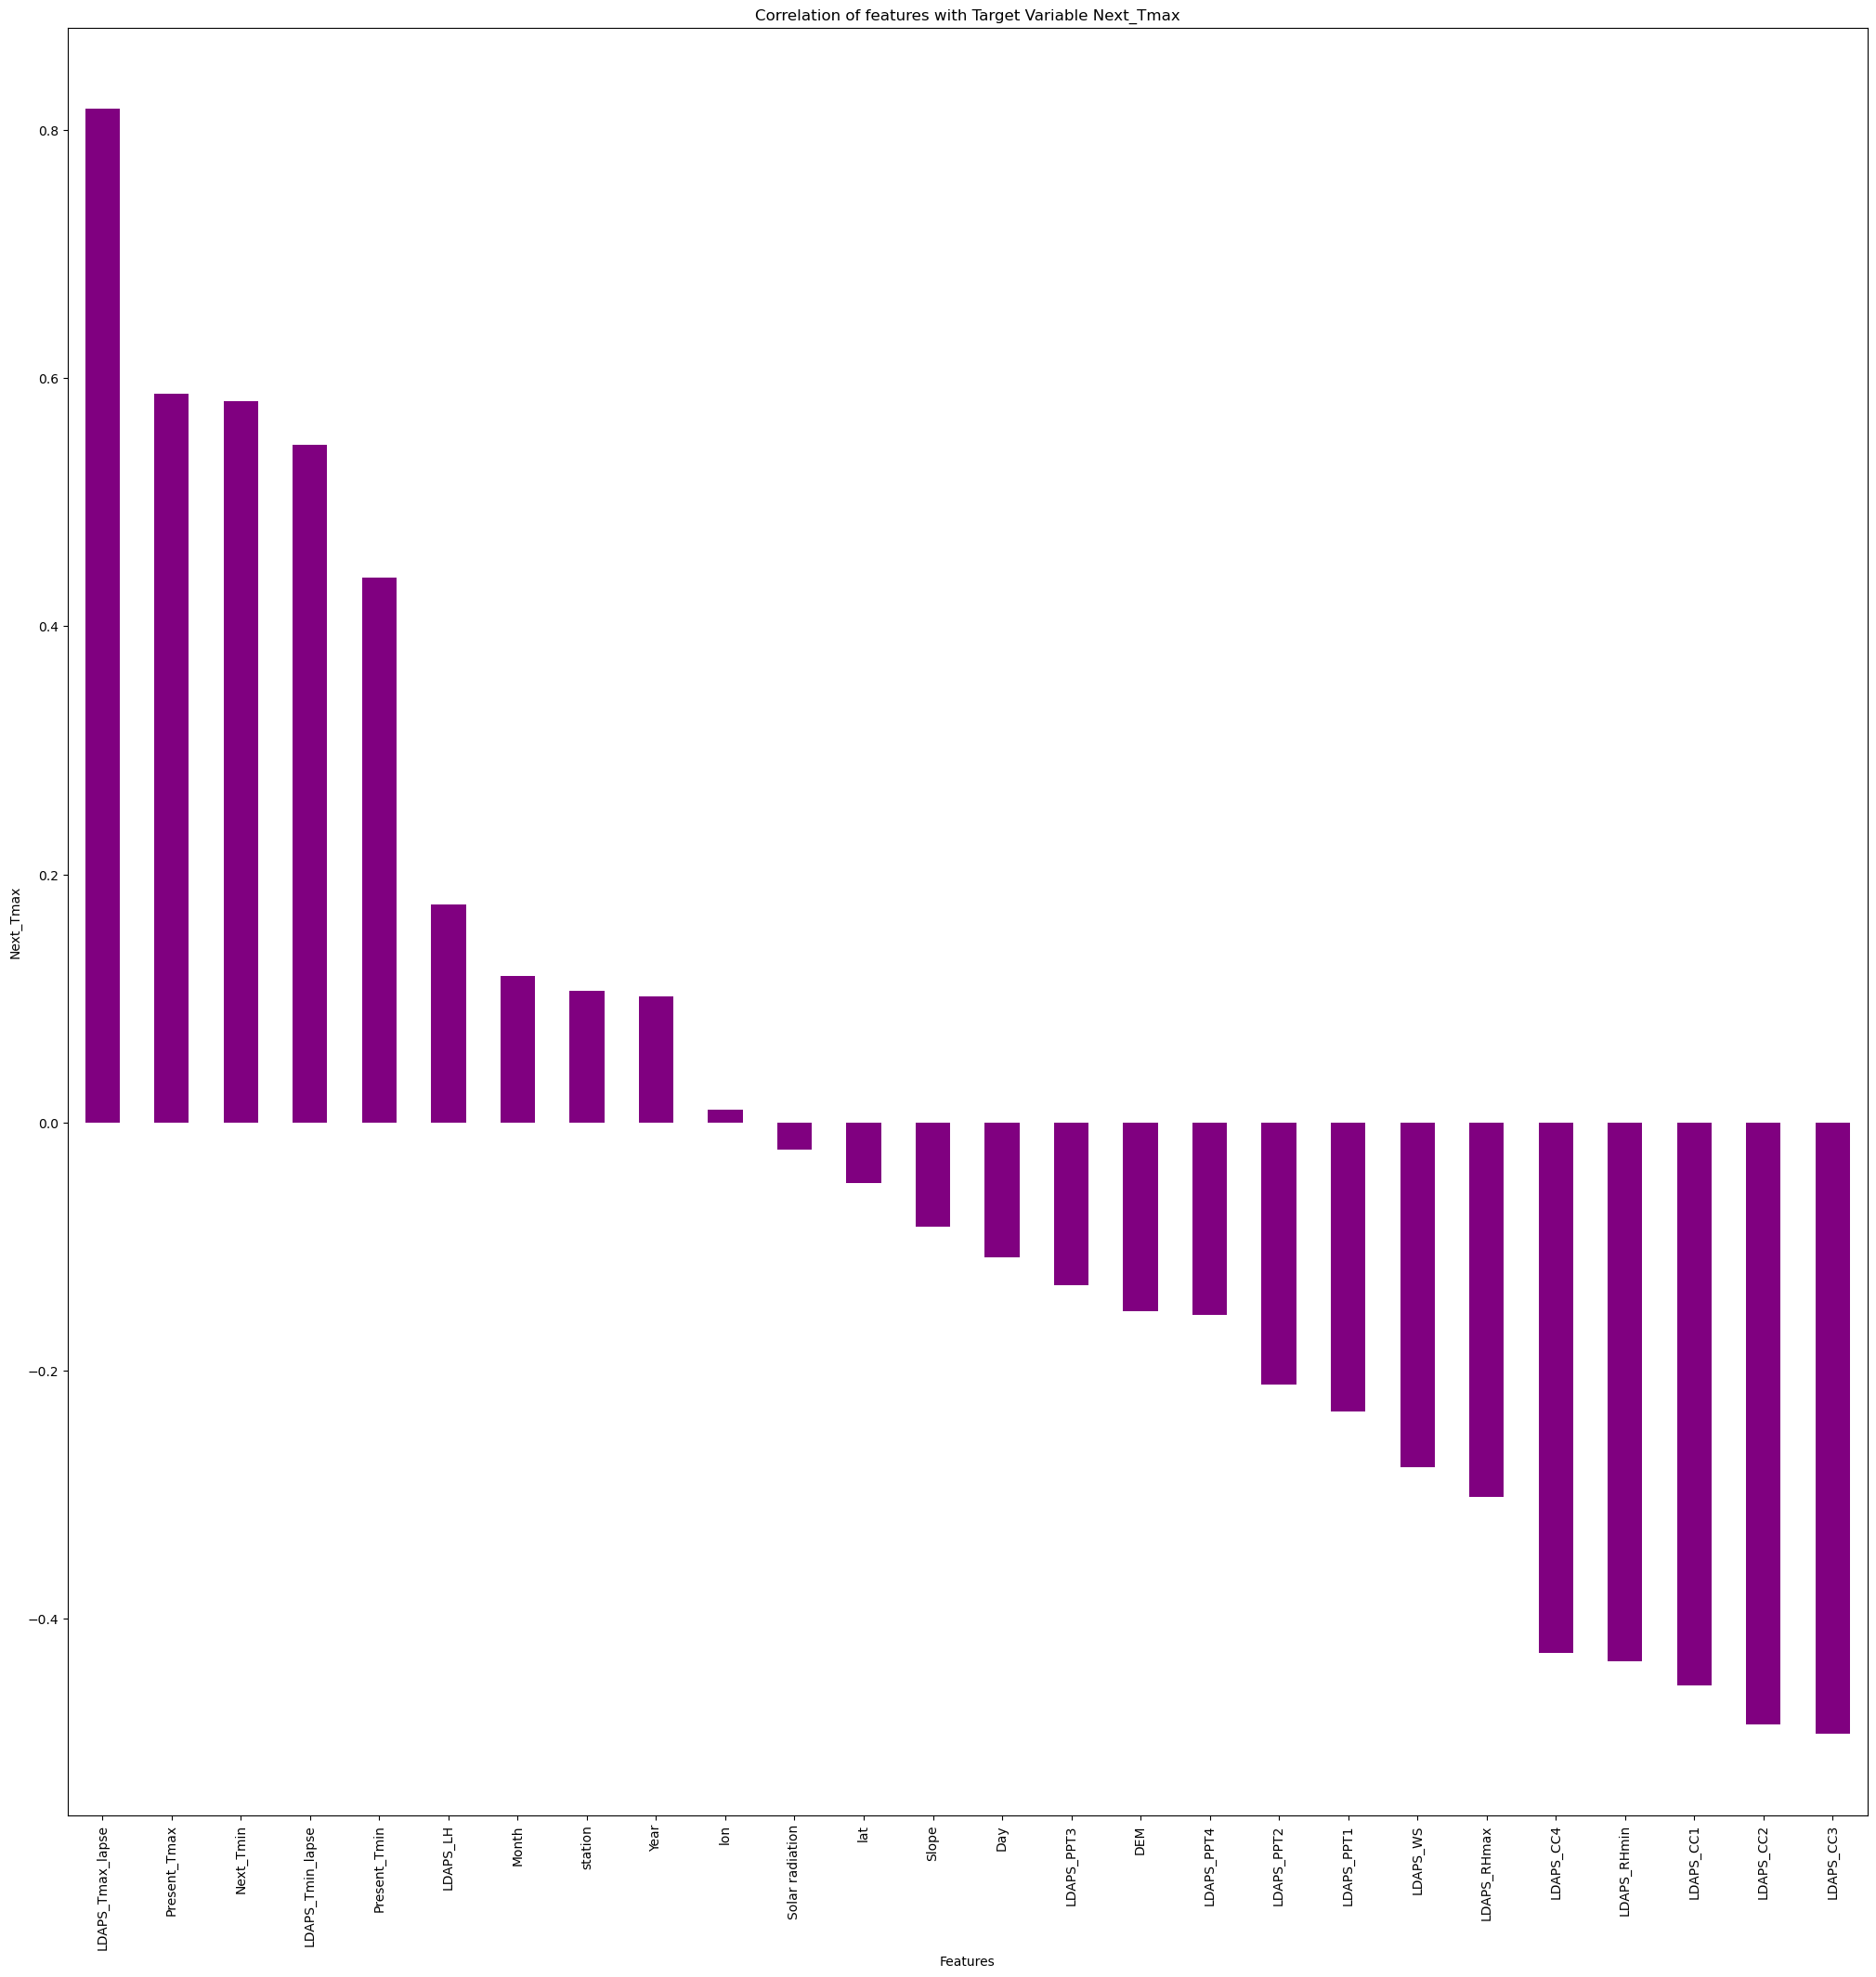

In [107]:
plt.figure(figsize=(25,25))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending = False).plot(kind = 'bar', color = 'purple')
plt.xlabel('Features')
plt.ylabel('Next_Tmax')
plt.title('Correlation of features with Target Variable Next_Tmax')
plt.show()

In [108]:
# Temperature and cloud cover feature are  moderately  or highly correlated with each other.

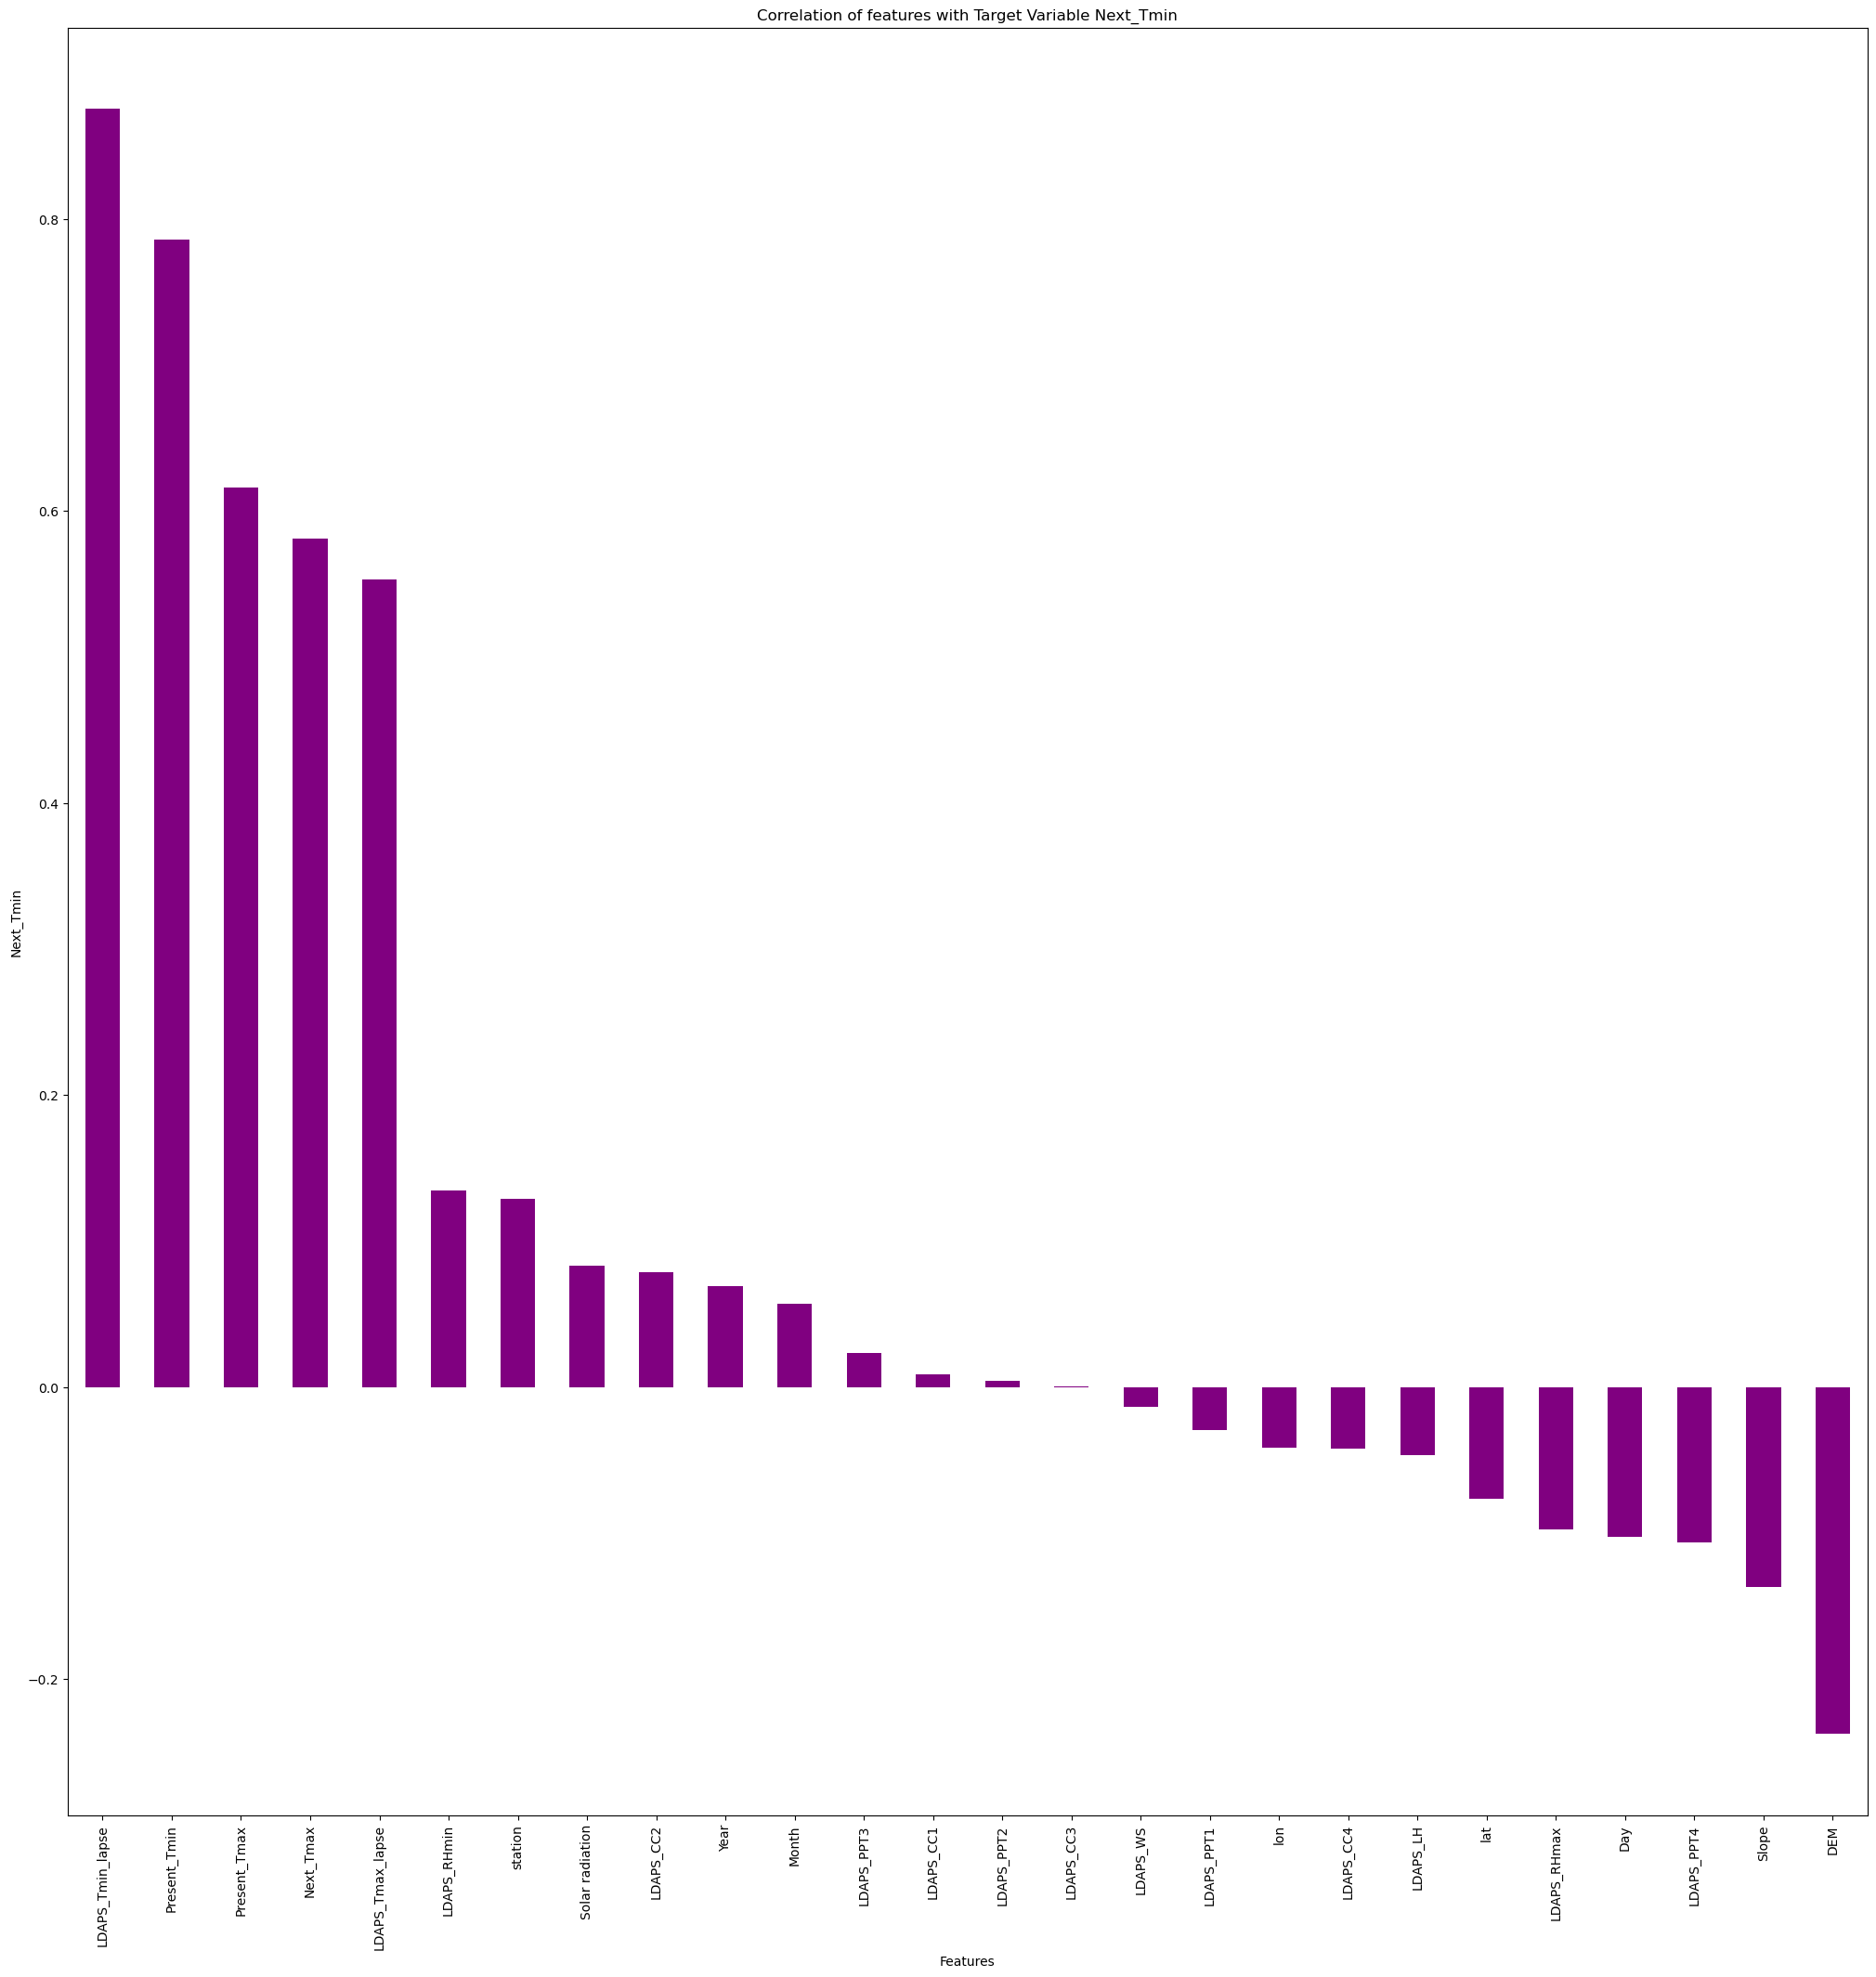

In [109]:
plt.figure(figsize=(25,25))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending = False).plot(kind = 'bar', color = 'purple')
plt.xlabel('Features')
plt.ylabel('Next_Tmin')
plt.title('Correlation of features with Target Variable Next_Tmin')
plt.show()

In [110]:
# Temperature related feature are moderately or highly coorelated with each other. 

In [111]:
# Standard Scaling of the dataset

In [112]:
# Building model for predicting the next day Maximum Temperature 'Next_Tmax'

In [113]:
#Splitting the dataset into x and y
x = df.drop('Next_Tmax',axis=1)
y = df['Next_Tmax']

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [115]:
# Principal Component Analysis

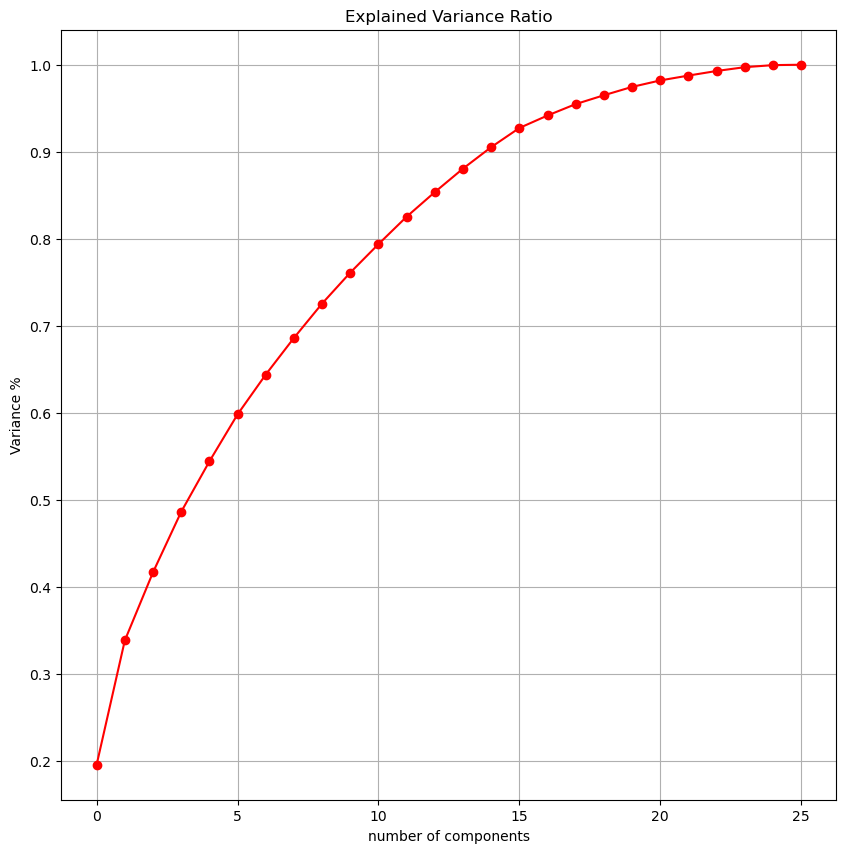

In [116]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find principal component analysis
x_pca = pca.fit_transform(x_scaler)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()

In [117]:
# As per the graph we can see that we can see that there are 15 principal components that attribute for 90% of the variation in the data

In [118]:
# So we will take 15 principal components

In [119]:
pca_new = PCA(n_components = 15)
x_new = pca_new.fit_transform(x_scaler)

In [120]:
principle_x = pd.DataFrame(x_new, columns = np.arange(15))

In [121]:
principle_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.739688,2.637147,-3.411048,-0.742825,0.511153,0.077052,-1.324558,-0.435717,1.665324,-1.986308,0.095171,0.795806,-0.694987,-0.005027,0.631157
1,-0.375159,0.769705,-1.647814,-2.015763,-1.379955,-0.756677,-1.253598,-0.361021,1.391483,-2.173123,0.234909,0.767858,-0.880905,-0.035221,0.473955
2,-0.756234,-0.142151,-1.025966,-2.416490,-0.827556,-0.639452,-1.922542,0.157150,1.617879,-2.035130,0.090058,0.956040,-0.705172,-0.180764,0.223115
3,-0.089969,0.529340,-2.760946,-1.024463,-1.417940,-0.567855,-1.130332,-0.765691,1.505771,-2.362736,0.246730,-0.188381,-0.702456,0.042035,1.042116
4,-0.354939,0.925475,-1.679846,-1.799096,-1.644938,-1.027909,-0.468821,-0.511604,1.732893,-1.883198,0.230985,-0.090328,-1.886724,-0.136907,-1.088889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-1.904286,4.995527,3.530623,-0.750340,-0.346683,-0.016300,-0.908417,0.289548,1.025827,1.472812,-0.040144,-0.381782,1.929430,0.066495,0.257299
6735,-1.578354,5.479854,3.239602,-0.429059,-1.184691,-0.133807,0.397173,-0.572341,0.962470,1.629810,0.107445,-0.948937,0.859740,-0.129312,-0.909534
6736,-1.828339,4.972612,3.658790,-0.658698,-0.388791,0.635752,0.874543,-1.066102,0.636287,0.964053,0.108006,-0.232356,1.677102,0.671006,0.316286
6737,-2.023578,4.626619,3.843848,-0.834200,-0.038048,0.801348,0.429354,-0.650408,0.811680,1.125310,0.059126,-0.195691,1.822793,0.501291,0.307217


In [122]:
# Model Building
# IMPORTING THE REQUIRED MODELS

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [124]:
# Splitting the dataset into train and test

In [125]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, y, test_size = 0.2, random_state = 42)

In [126]:
x_train.shape

(5391, 15)

In [127]:
x_test.shape

(1348, 15)

In [128]:
y_train.shape

(5391,)

In [129]:
y_test.shape

(1348,)

In [130]:
models = {'LinearRegression':LinearRegression(), 'RandomForestRegressor':RandomForestRegressor(), 'GradientBoostingRegressor':GradientBoostingRegressor(), 'AdaBoostRegressor':AdaBoostRegressor(),'DecisionTreeRegressor': DecisionTreeRegressor(),'SVR': SVR(), 'Ridge':Ridge(), 'Lasso':Lasso(), 'XGBRegressor':XGBRegressor()}

In [131]:
for model_name , model in models.items():
    print(f'Using model {model_name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training score : {model.score(x_train, y_train)}')
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Mean Squared Error : {mse}')
    print(f'{model_name} Mean Absolute Error : {mae}')
    print(f'{model_name} R2 Score : {r2}')

Using model LinearRegression
Training score : 0.7572426135616006
LinearRegression Mean Squared Error : 2.185231316874098
LinearRegression Mean Absolute Error : 1.1386722142645718
LinearRegression R2 Score : 0.7455173264304564
Using model RandomForestRegressor
Training score : 0.975749111868451
RandomForestRegressor Mean Squared Error : 1.5225901639465882
RandomForestRegressor Mean Absolute Error : 0.9388286350148373
RandomForestRegressor R2 Score : 0.822685675113752
Using model GradientBoostingRegressor
Training score : 0.8222893813432566
GradientBoostingRegressor Mean Squared Error : 2.0302669826356707
GradientBoostingRegressor Mean Absolute Error : 1.1055913564223687
GradientBoostingRegressor R2 Score : 0.7635638086405553
Using model AdaBoostRegressor
Training score : 0.7059844684324482
AdaBoostRegressor Mean Squared Error : 2.848779913818356
AdaBoostRegressor Mean Absolute Error : 1.371303992573093
AdaBoostRegressor R2 Score : 0.6682433007061477
Using model DecisionTreeRegressor
Tra

In [132]:
# It seems that Random Forest Regressor becomes the best model to perform with lowest mean absolute error as well as mean squared error  and highest R2 score

In [133]:
# Cross validating the models

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
for model_name , model in models.items():
    print(f'Evaluating model {model_name}.....!')
    scores = cross_val_score(model, principle_x, y, cv = 5, scoring = 'neg_mean_squared_error')
    mse_scores = -scores
    average_mean_scores = mse_scores.mean()
    print(f'{model_name} Average Mean Scores : {average_mean_scores}')

Evaluating model LinearRegression.....!
LinearRegression Average Mean Scores : 2.506043321081031
Evaluating model RandomForestRegressor.....!
RandomForestRegressor Average Mean Scores : 3.019755813969721
Evaluating model GradientBoostingRegressor.....!
GradientBoostingRegressor Average Mean Scores : 2.780215931935847
Evaluating model AdaBoostRegressor.....!
AdaBoostRegressor Average Mean Scores : 3.348098557722431
Evaluating model DecisionTreeRegressor.....!
DecisionTreeRegressor Average Mean Scores : 5.277267627368435
Evaluating model SVR.....!
SVR Average Mean Scores : 2.7955999564631417
Evaluating model Ridge.....!
Ridge Average Mean Scores : 2.5059862096459566
Evaluating model Lasso.....!
Lasso Average Mean Scores : 3.573277407927045
Evaluating model XGBRegressor.....!
XGBRegressor Average Mean Scores : 3.19575522591001


In [136]:
# Based on these  average mean scores we can say that Linear Regression and Ridge regression models are performing comparatively well
# With lowest average mean scores values

In [137]:
# Decision Tree Regressor model has the lowest average mean scores suggesting comparatively poor performance  

In [138]:
# HYPER PARAMETER TUNING OF LINEAR REGRESSION MODEL

In [139]:
model = LinearRegression()
param_grid = {'fit_intercept': [True, False], 'positive': [True, False], 'copy_X': [True, False]}

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [142]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [143]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [144]:
# Final Regression Model

In [145]:
best_params = {'copy_X': True, 'fit_intercept': True, 'positive': False}

In [146]:
# Creating final model using best_parameters

In [147]:
final_model = LinearRegression(**best_params)

In [148]:
final_model.fit(x_train, y_train)

LinearRegression()

In [149]:
y_pred = final_model.predict(x_test)

In [150]:
print(f'Training score : {final_model.score(x_train, y_train)}')

Training score : 0.7572426135616006


In [151]:
mse = mean_squared_error(y_test, y_pred)

In [152]:
print(f'Mean Squared Error : {mse}')

Mean Squared Error : 2.185231316874098


In [153]:
mae = mean_absolute_error(y_test, y_pred)

In [154]:
print(f'Mean Absolute Error : {mae}')

Mean Absolute Error : 1.1386722142645718


In [155]:
r2 = r2_score(y_test, y_pred)

In [156]:
print(f'R2 Score : {r2}')

R2 Score : 0.7455173264304564


In [157]:
# Hence Linear Regression model is the best model to performing the Next Day Maximum Temperature Forecasting Project

In [196]:
# Saving the model for future use of Next Day Maximum Temperature Forecasting

In [195]:
filename = 'final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

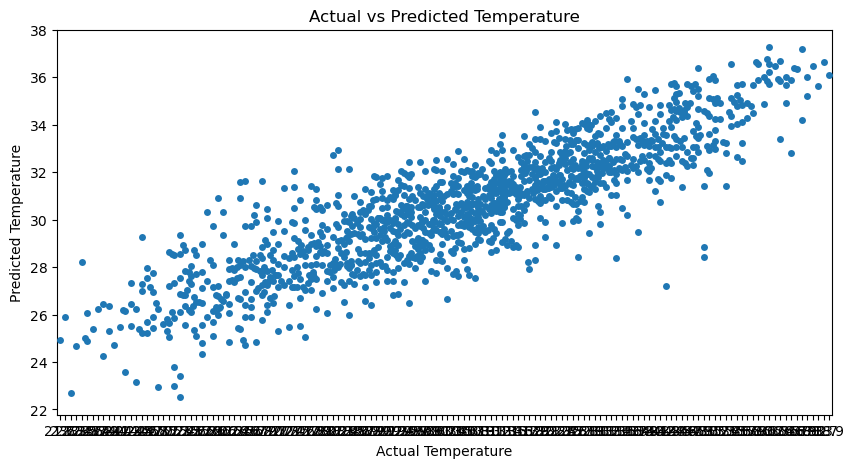

In [158]:
plt.figure(figsize = (10, 5))
sns.swarmplot(x = y_test, y = y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [159]:
import pickle

In [160]:
# Saving Model

In [161]:
pickle.dump(final_model, open('final_model.pkl', 'wb'))

In [162]:
# Predicted values vs actual values

In [163]:
Actual_values = np.array(y_test)
predicted_values = np.array(y_pred)
df_predicted = pd.DataFrame({'Actual': Actual_values, 'Predicted': predicted_values})
df_predicted

,Actual,Predicted
0,30.9,29.933791
1,30.2,28.534432
2,33.3,31.993598
3,35.1,32.928485
4,31.2,31.562082
...,...,...
1343,29.9,29.495542
1344,33.8,33.139399
1345,33.0,34.136228
1346,35.6,34.018041


In [164]:
# Machine Learning Model Building for Next_Tmin Temperature

In [165]:
# Splitting the data into target and dependent features

In [166]:
x = df.drop(['Next_Tmin'], axis = 1)
y = df['Next_Tmin']

In [167]:
# Scaling the data

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [169]:
# Splitting the training and testing test

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.2, random_state = 42)

In [171]:
x_train.shape

(5391, 26)

In [172]:
x_test.shape

(1348, 26)

In [173]:
y_train.shape

(5391,)

In [174]:
y_test.shape

(1348,)

In [176]:
models = {'LinearRegression':LinearRegression(), 'RandomForestRegressor':RandomForestRegressor(), 'GradientBoostingRegressor':GradientBoostingRegressor(), 'AdaBoostRegressor':AdaBoostRegressor(),'DecisionTreeRegressor': DecisionTreeRegressor(),'SVR': SVR(), 'Ridge':Ridge(), 'Lasso':Lasso(), 'XGBRegressor':XGBRegressor()}

In [177]:
for model_name , model in models.items():
    print(f'Using model {model_name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training score : {model.score(x_train, y_train)}')
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Mean Squared Error : {mse}')
    print(f'{model_name} Mean Absolute Error : {mae}')
    print(f'{model_name} R2 Score : {r2}')

Using model LinearRegression
Training score : 0.8447685068661979
LinearRegression Mean Squared Error : 0.9158605338350936
LinearRegression Mean Absolute Error : 0.7585774183600221
LinearRegression R2 Score : 0.8353598934218638
Using model RandomForestRegressor
Training score : 0.9864941792253649
RandomForestRegressor Mean Squared Error : 0.5251227804154307
RandomForestRegressor Mean Absolute Error : 0.5557537091988132
RandomForestRegressor R2 Score : 0.9056010524089569
Using model GradientBoostingRegressor
Training score : 0.9099350238976834
GradientBoostingRegressor Mean Squared Error : 0.6155395930584884
GradientBoostingRegressor Mean Absolute Error : 0.6237760560511898
GradientBoostingRegressor R2 Score : 0.8893472308716608
Using model AdaBoostRegressor
Training score : 0.8221285987090372
AdaBoostRegressor Mean Squared Error : 1.0885900646082525
AdaBoostRegressor Mean Absolute Error : 0.8470725686642078
AdaBoostRegressor R2 Score : 0.804309086770548
Using model DecisionTreeRegressor

In [178]:
# Random Forest Regressor is the best model to perform with lowest mean absolute error as well as mean squared error and highest R2 score

In [179]:
# Cross Validating the models 

In [180]:
for model_name , model in models.items():
    print(f'Evaluating model {model_name}.....!')
    scores = cross_val_score(model, principle_x, y, cv = 5, scoring = 'neg_mean_squared_error')
    mse_scores = -scores
    average_mean_scores = mse_scores.mean()
    print(f'{model_name} Average Mean Scores : {average_mean_scores}')

Evaluating model LinearRegression.....!
LinearRegression Average Mean Scores : 0.6293010294884402
Evaluating model RandomForestRegressor.....!
RandomForestRegressor Average Mean Scores : 0.8453068362422045
Evaluating model GradientBoostingRegressor.....!
GradientBoostingRegressor Average Mean Scores : 0.733105566188604
Evaluating model AdaBoostRegressor.....!
AdaBoostRegressor Average Mean Scores : 1.0329786105575638
Evaluating model DecisionTreeRegressor.....!
DecisionTreeRegressor Average Mean Scores : 1.6535483181660973
Evaluating model SVR.....!
SVR Average Mean Scores : 0.7842702798364611
Evaluating model Ridge.....!
Ridge Average Mean Scores : 0.6292852399819647
Evaluating model Lasso.....!
Lasso Average Mean Scores : 1.6314072283120091
Evaluating model XGBRegressor.....!
XGBRegressor Average Mean Scores : 0.7866734512051632


In [181]:
# It seems that Random forest Regressor model performs well with average mean scores of 0.846

In [182]:
#Hyper Parameter Tuning of Random Forest Regressor Model

In [183]:
model = RandomForestRegressor()
param_grid = {'n_estimators': [50,100, 200], 'max_depth': [None,5,10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

In [184]:
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'r2',n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [185]:
print("Best Parameters :",grid_search.best_params_)
print("Best Score :",grid_search.best_score_)

Best Parameters : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score : 0.8997217735402223


In [186]:
# FINAL MODEL 

In [187]:
best_params_ = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [188]:
final_model = RandomForestRegressor(**best_params_)

In [189]:
final_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [190]:
y_pred = final_model.predict(x_test)

In [191]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [192]:
print(f'Mean Squared Error : {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'R2 Score : {r2}')

Mean Squared Error : 0.5171755931008913
Mean Absolute Error : 0.5518345697329381
R2 Score : 0.90702968233472


In [193]:
# This our final model for Next_Tmin Temperature

In [197]:
# Saving the model for future use of Next_Tmin Temperature

In [194]:
import pickle
file = open('final_model.pkl', 'wb')
pickle.dump(final_model, file)